# WorldQuant University
## MscFE690 Capstone Project
### Student Group 7119

Abhijeet Aanand

Amparo Garcia Garcia

*NOTE.- Plotly graphs are interactive but unfortunately for conversion to pdf they are not the best option and sometimes the graph will appear as a blank space, therefore there is also the correspondant variant with matplotlib and seaborn.*

# Analysis of Stock Indexes

In [50]:
!pip install riskfolio-lib

In [51]:
import pandas as pd
import yfinance as yf
import numpy as np
import plotly.express as px
import seaborn as sn
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.offline as pyo
import plotly.io as pio

pio.renderers.default = "notebook"

In [52]:
# List of some of the most important world stock indexes
#stock_indexes = pd.read_html('https://finance.yahoo.com/world-indices')[0]
#print('Shape of dataframe of stock indexes: ', stock_indexes.shape)
#Most traded stocks worldwide
#stock_indexes.sort_values(by="Volume", ascending=False).head()

In [53]:
#Most expensive indexes
#stock_indexes.sort_values(by="Last Price", ascending=False).head()

In [54]:
#Define some indexes from each continent
continents=['Africa', 'America', 'Asia', 'Europe', 'Oceania']
tickers_af=['^ZADOW', '^NQMAEURN'] #Dow Jones South Africa, Nasdaq Morocco EUR NTR
tickers_am=['^BVSP', '^DJI', '^IXIC', '^GSPC', '^MXX'] #Bovespa (Brasil), Dow Jones (USA), Nasdaq (USA), IPC Mexico
tickers_as=['^HSI', '^NSEI', '^N225'] #Hang Seng Index (China), Nifty 50 (India), Nikkei 255 (Japan)
tickers_eu=['^FCHI', '^GDAXI', '^IBEX', '^STOXX50E', '^FTSE'] #CAC 40 (France), DAX 30 (Germany), IBEX 35 (Spain), EuroStoxx 50 (Whole Euro Zone), FTSE 100 (UK)
tickers_oc=['^AXJO'] #S&P/ASX 200 (Australia)
start_date='2018-01-01'
end_date='2023-12-31'

In [55]:
def extract_data(tickers, start_date, end_date):
  df_all=pd.DataFrame()
  df_returns_all=pd.DataFrame()
  lista_df=[]
  for ticker in tickers:
    df=yf.download(ticker, start=start_date, end=end_date)
    df=df[['Adj Close', 'Volume']]
    lista_df.append(df)
    df_all[f'{ticker}']=df['Adj Close']
    df_returns_all[f'{ticker}']=np.log(df["Adj Close"] / df["Adj Close"].shift(1))

  return [lista_df, df_all, df_returns_all]

In [56]:
df_africa, df_af, df_ret_af=extract_data(tickers_af, start_date, end_date)
df_america, df_am, df_ret_am=extract_data(tickers_am, start_date, end_date)
df_asia, df_as, df_ret_as=extract_data(tickers_as, start_date, end_date)
df_europe, df_eu, df_ret_eu=extract_data(tickers_eu, start_date, end_date)
df_oceania, df_oc, df_ret_oc=extract_data(tickers_oc, start_date, end_date)
df_continents=[df_af, df_am, df_as, df_eu, df_oc]
df_returns_continents=[df_ret_af, df_ret_am, df_ret_as, df_ret_eu, df_ret_oc]

[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['^ZADOW']: YFPricesMissingError('$%ticker%: possibly delisted; no price data found  (1d 2018-01-01 -> 2023-12-31)')
[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['^NQMAEURN']: YFPricesMissingError('$%ticker%: possibly delisted; no price data found  (1d 2018-01-01 -> 2023-12-31)')
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%****************

Statistics for Africa


^ZADOW  ^NQMAEURN
count     0.0        0.0
mean      NaN        NaN
std       NaN        NaN
min       NaN        NaN
25%       NaN        NaN
50%       NaN        NaN
75%       NaN        NaN
max       NaN        NaN

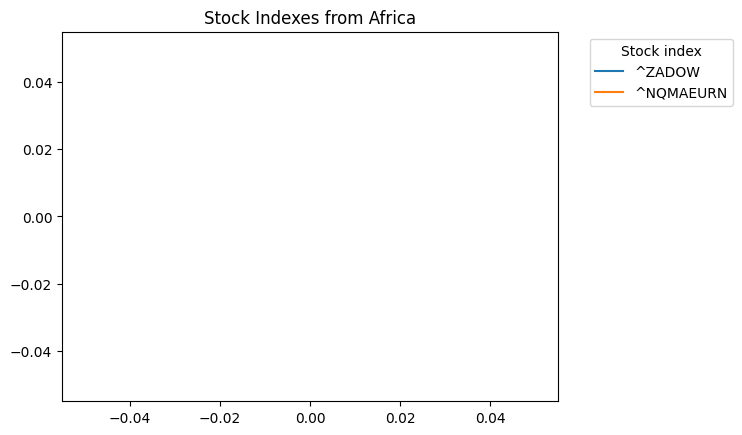

Statistics for America


^BVSP          ^DJI         ^IXIC        ^GSPC          ^MXX
count    1486.000000   1448.000000   1448.000000  1448.000000   1455.000000
mean   103656.431359  29904.494079  10862.477749  3590.001816  47040.513364
std     14316.872524   4161.868370   2754.495955   690.505916   5366.535885
min     63570.000000  18591.929688   6332.990234  2237.399902  32964.218750
25%     95394.000000  25998.157227   7971.292603  2888.770020  43385.755859
50%    105530.500000  30046.304688  11146.259766  3688.635010  47884.628906
75%    114815.500000  33917.252930  13454.115234  4204.595093  51310.720703
max    134194.000000  37710.101562  16057.440430  4796.560059  57745.789062

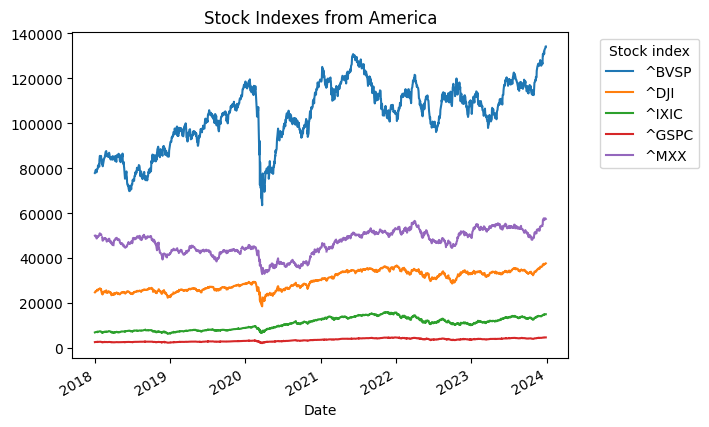

Statistics for Asia


^HSI         ^NSEI         ^N225
count   1476.000000   1406.000000   1383.000000
mean   24714.723686  14244.860500  25608.416373
std     4141.279110   3400.624963   3831.726407
min    14687.019531   7610.250000  16552.830078
25%    20990.647949  11074.062744  22270.130859
50%    25558.565430  13902.899902  26170.300781
75%    28108.877441  17515.288086  28447.955078
max    33154.121094  21778.699219  33753.328125

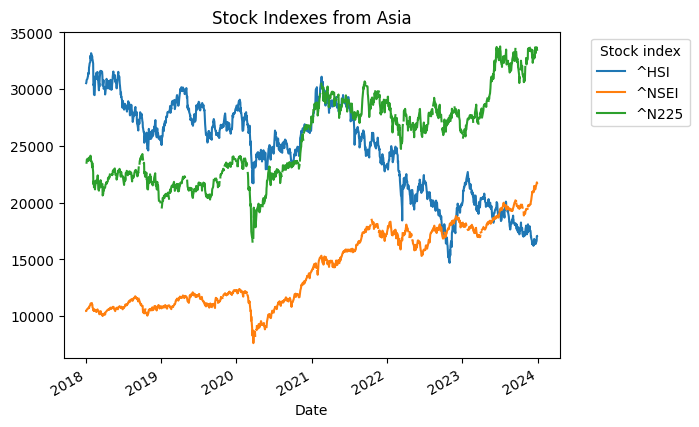

Statistics for Europe


^FCHI        ^GDAXI         ^IBEX    ^STOXX50E        ^FTSE
count  1537.000000   1523.000000   1535.000000  1509.000000  1510.000000
mean   5988.280634  13587.317331   8779.078625  3692.238741  7147.872915
std     851.428385   1663.337689    867.381635   421.504538   536.796755
min    3754.840088   8441.709961   6107.200195  2385.820068  4993.899902
25%    5344.640137  12346.544922   8311.750000  3385.379883  7001.699951
50%    5889.700195  13253.740234   8966.200195  3611.080078  7277.700195
75%    6679.089844  15244.794922   9360.100098  4091.709961  7513.299927
max    7596.910156  16794.429688  10609.500000  4549.439941  8014.299805

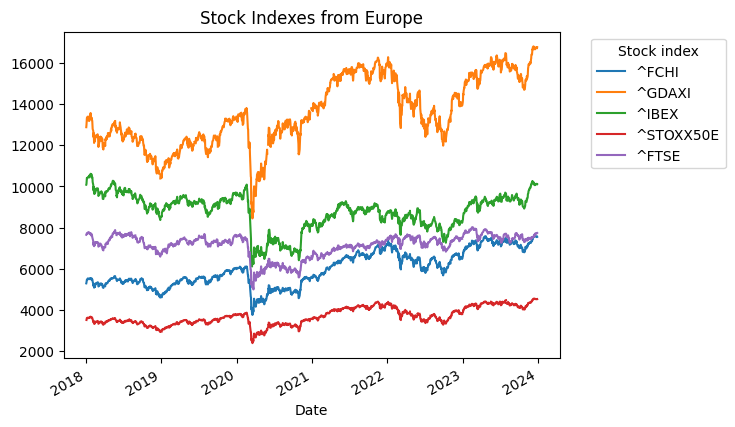

Statistics for Oceania


^AXJO
count  1517.000000
mean   6662.082600
std     596.893016
min    4546.000000
25%    6155.600098
50%    6745.399902
75%    7175.799805
max    7628.899902

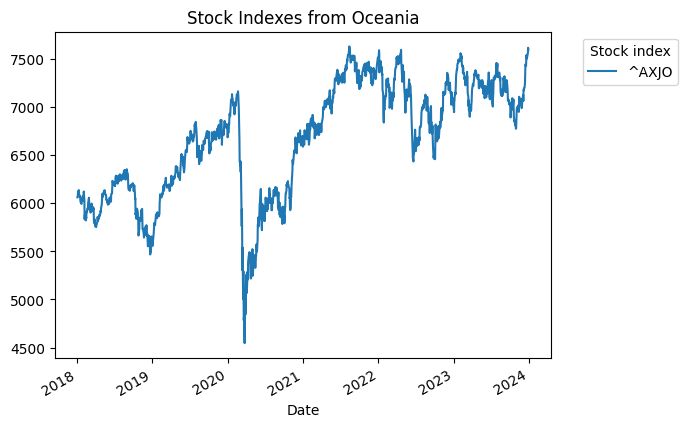

In [57]:
for i in range(len(continents)):
  print(f'Statistics for {continents[i]}')
  display(df_continents[i].describe())
  #display(px.line(df_continents[i], title=f'Stock Indexes from {continents[i]}'))
  (df_continents[i]).plot()
  plt.title(f'Stock Indexes from {continents[i]}')
  plt.legend(title='Stock index', bbox_to_anchor=(1.05, 1), loc='upper left')
  plt.show()


In [58]:
df_all_continents=pd.concat([df_af, df_am, df_as, df_eu, df_oc])
df_all_continents.head()

^ZADOW  ^NQMAEURN    ^BVSP          ^DJI        ^IXIC  \
2018-01-02     NaN        NaN  77891.0  24824.009766  7006.899902   
2018-01-03     NaN        NaN  77995.0  24922.679688  7065.529785   
2018-01-04     NaN        NaN  78647.0  25075.130859  7077.910156   
2018-01-05     NaN        NaN  79071.0  25295.869141  7136.560059   
2018-01-08     NaN        NaN  79379.0  25283.000000  7157.390137   

                  ^GSPC          ^MXX  ^HSI  ^NSEI  ^N225  ^FCHI  ^GDAXI  \
2018-01-02  2695.810059  50033.949219   NaN    NaN    NaN    NaN     NaN   
2018-01-03  2713.060059  49782.230469   NaN    NaN    NaN    NaN     NaN   
2018-01-04  2723.989990  49744.621094   NaN    NaN    NaN    NaN     NaN   
2018-01-05  2743.149902  49887.738281   NaN    NaN    NaN    NaN     NaN   
2018-01-08  2747.709961  49995.570312   NaN    NaN    NaN    NaN     NaN   

            ^IBEX  ^STOXX50E  ^FTSE  ^AXJO  
2018-01-02    NaN        NaN    NaN    NaN  
2018-01-03    NaN        NaN    NaN    NaN  
2018-01-04    NaN        NaN    NaN    NaN  
2018-01-05    NaN        NaN    NaN    NaN  
2018-01-08    NaN        NaN    NaN    NaN

<Figure size 10000x1000 with 0 Axes>

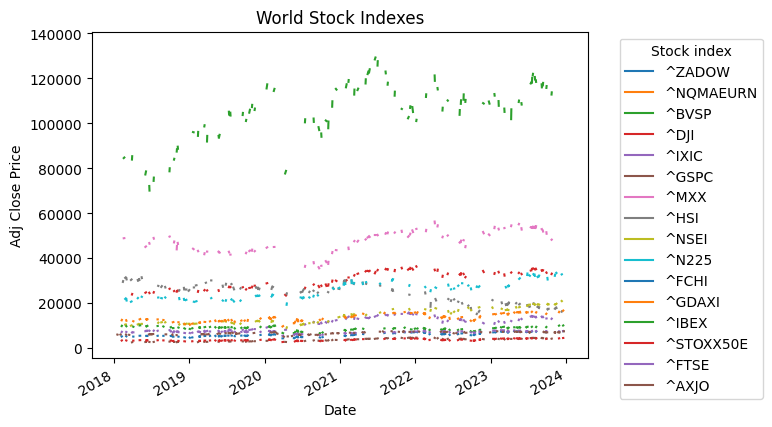

In [59]:
#px.line(df_all_continents, title=f'World Stock Indexes')
plt.figure(figsize=(100,10))
df_all_continents.plot()
plt.legend(title='Stock index', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title('World Stock Indexes')
plt.xlabel('Date')
plt.ylabel('Adj Close Price')
plt.show();

As it is shown in the graphs above, BOVESPA and NSEI are chosen because they are from BRICS countries so it will be interesting to analyze them regarding for example GDAXI (Germany) and IBEX (Spain). From USA Dow Jones (DJI) will be our choice, from China HSI and from the European Union we will choose STOXX50E.

From Africa and Australia none are chosen as there are not so many data available of them.

# GDAXI Index (Germany)

In [60]:
start_date='2022-01-01'
end_date='2023-12-31'
gdaxi_stocks=['BAYN.DE' , 'VNA.DE' , 'ENR.DE' , 'SHL.DE' , 'RWE.DE' , 'SY1.DE' , '1COV.DE' , 'ADS.DE' , 'MRK.DE' , 'MTX.DE' , 'EOAN.DE' , 'BEI.DE' , 'DTE.DE' , 'HEI.DE' , 'ALV.DE' , 'P911.DE' , 'DB1.DE' , 'DHL.DE' , 'ZAL.DE' , 'FRE.DE' , 'DBK.DE' , 'HNR1.DE' , 'DTG.DE' , 'SIE.DE' , 'AIR.DE' , 'BMW.DE' , 'BAS.DE' , 'VOW3.DE' , 'CON.DE' , 'IFX.DE']

def get_correlations(market_index, continent, stocks, start_date, end_date):
  df1, df2, df3=extract_data(gdaxi_stocks, start_date, end_date);
  df2.fillna(0,inplace=True)
  if continent=='EU':
    df2.loc[:,f'{market_index}']=df_eu[f'^{market_index}']
  elif continent=='AM':
    df2.loc[:,f'{market_index}']=df_am[f'^{market_index}']
  elif continent=='AF':
    df2.loc[:,f'{market_index}']=df_af[f'^{market_index}']
  elif continent=='AS':
    df2.loc[:,f'{market_index}']=df_as[f'^{market_index}']
  elif continent=='OC':
    df2.loc[:,f'{market_index}']=df_oc[f'^{market_index}']
  else:
    print('Not a valid continent')
  #display(px.line(df2.drop(f'{market_index}', axis=1), title=f'{market_index} market index components'))
  plt.figure(figsize=(100,10))
  (df2.drop(f'{market_index}', axis=1)).plot()
  plt.title(f'{market_index} market index components')
  plt.legend(title='Stock index', bbox_to_anchor=(1.05, 1), loc='upper left', ncol=2)
  plt.show()



  #display(px.line(df2[f'{market_index}'], title=f'{market_index} market index'))

  (df2[f'{market_index}']).plot()
  plt.title(f'{market_index} market index ')
  plt.legend(title='Stock index', bbox_to_anchor=(1.05, 1), loc='upper left')
  plt.show()


  #display(px.imshow(round(df2.corr(),3), text_auto=True, aspect="auto", title='Correlation of Adjusted Prices'))
  fig, ax = plt.subplots(figsize=(30, 15))

  sn.heatmap(round(df2.corr(),3), annot=True)
  fig.set_tight_layout(True)
  plt.title('Correlation of Adjusted Prices')
  plt.show()
  #Now we will do the same with the returns
  df4 = df2.pct_change()
  df4 = df4[1:]
  #display(px.imshow(round(df4.corr(),3), text_auto=True, aspect="auto", title='Correlation of Returns'))

  fig, ax = plt.subplots(figsize=(30, 15))

  sn.heatmap(round(df4.corr(),3), annot=True)
  fig.set_tight_layout(True)
  plt.title('Correlation of Returns')
  plt.show()

  return [df2, df4]

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

<Figure size 10000x1000 with 0 Axes>

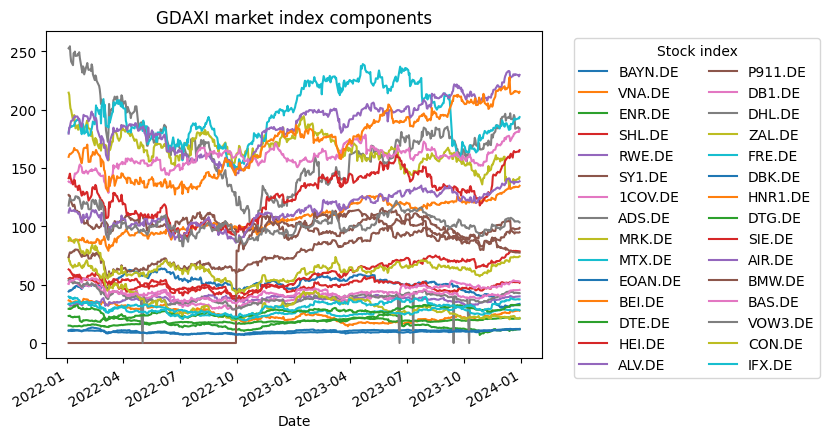

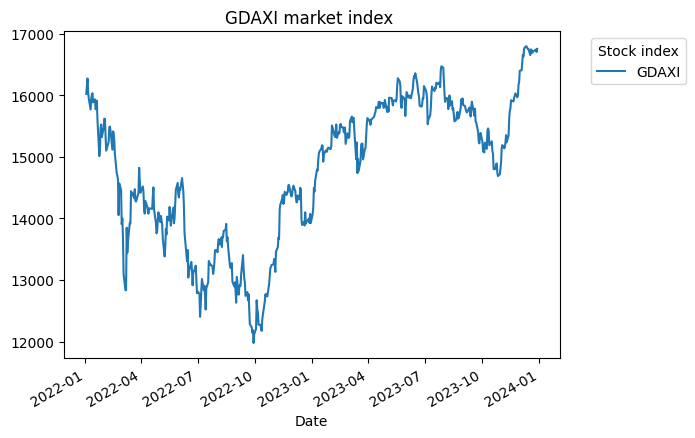

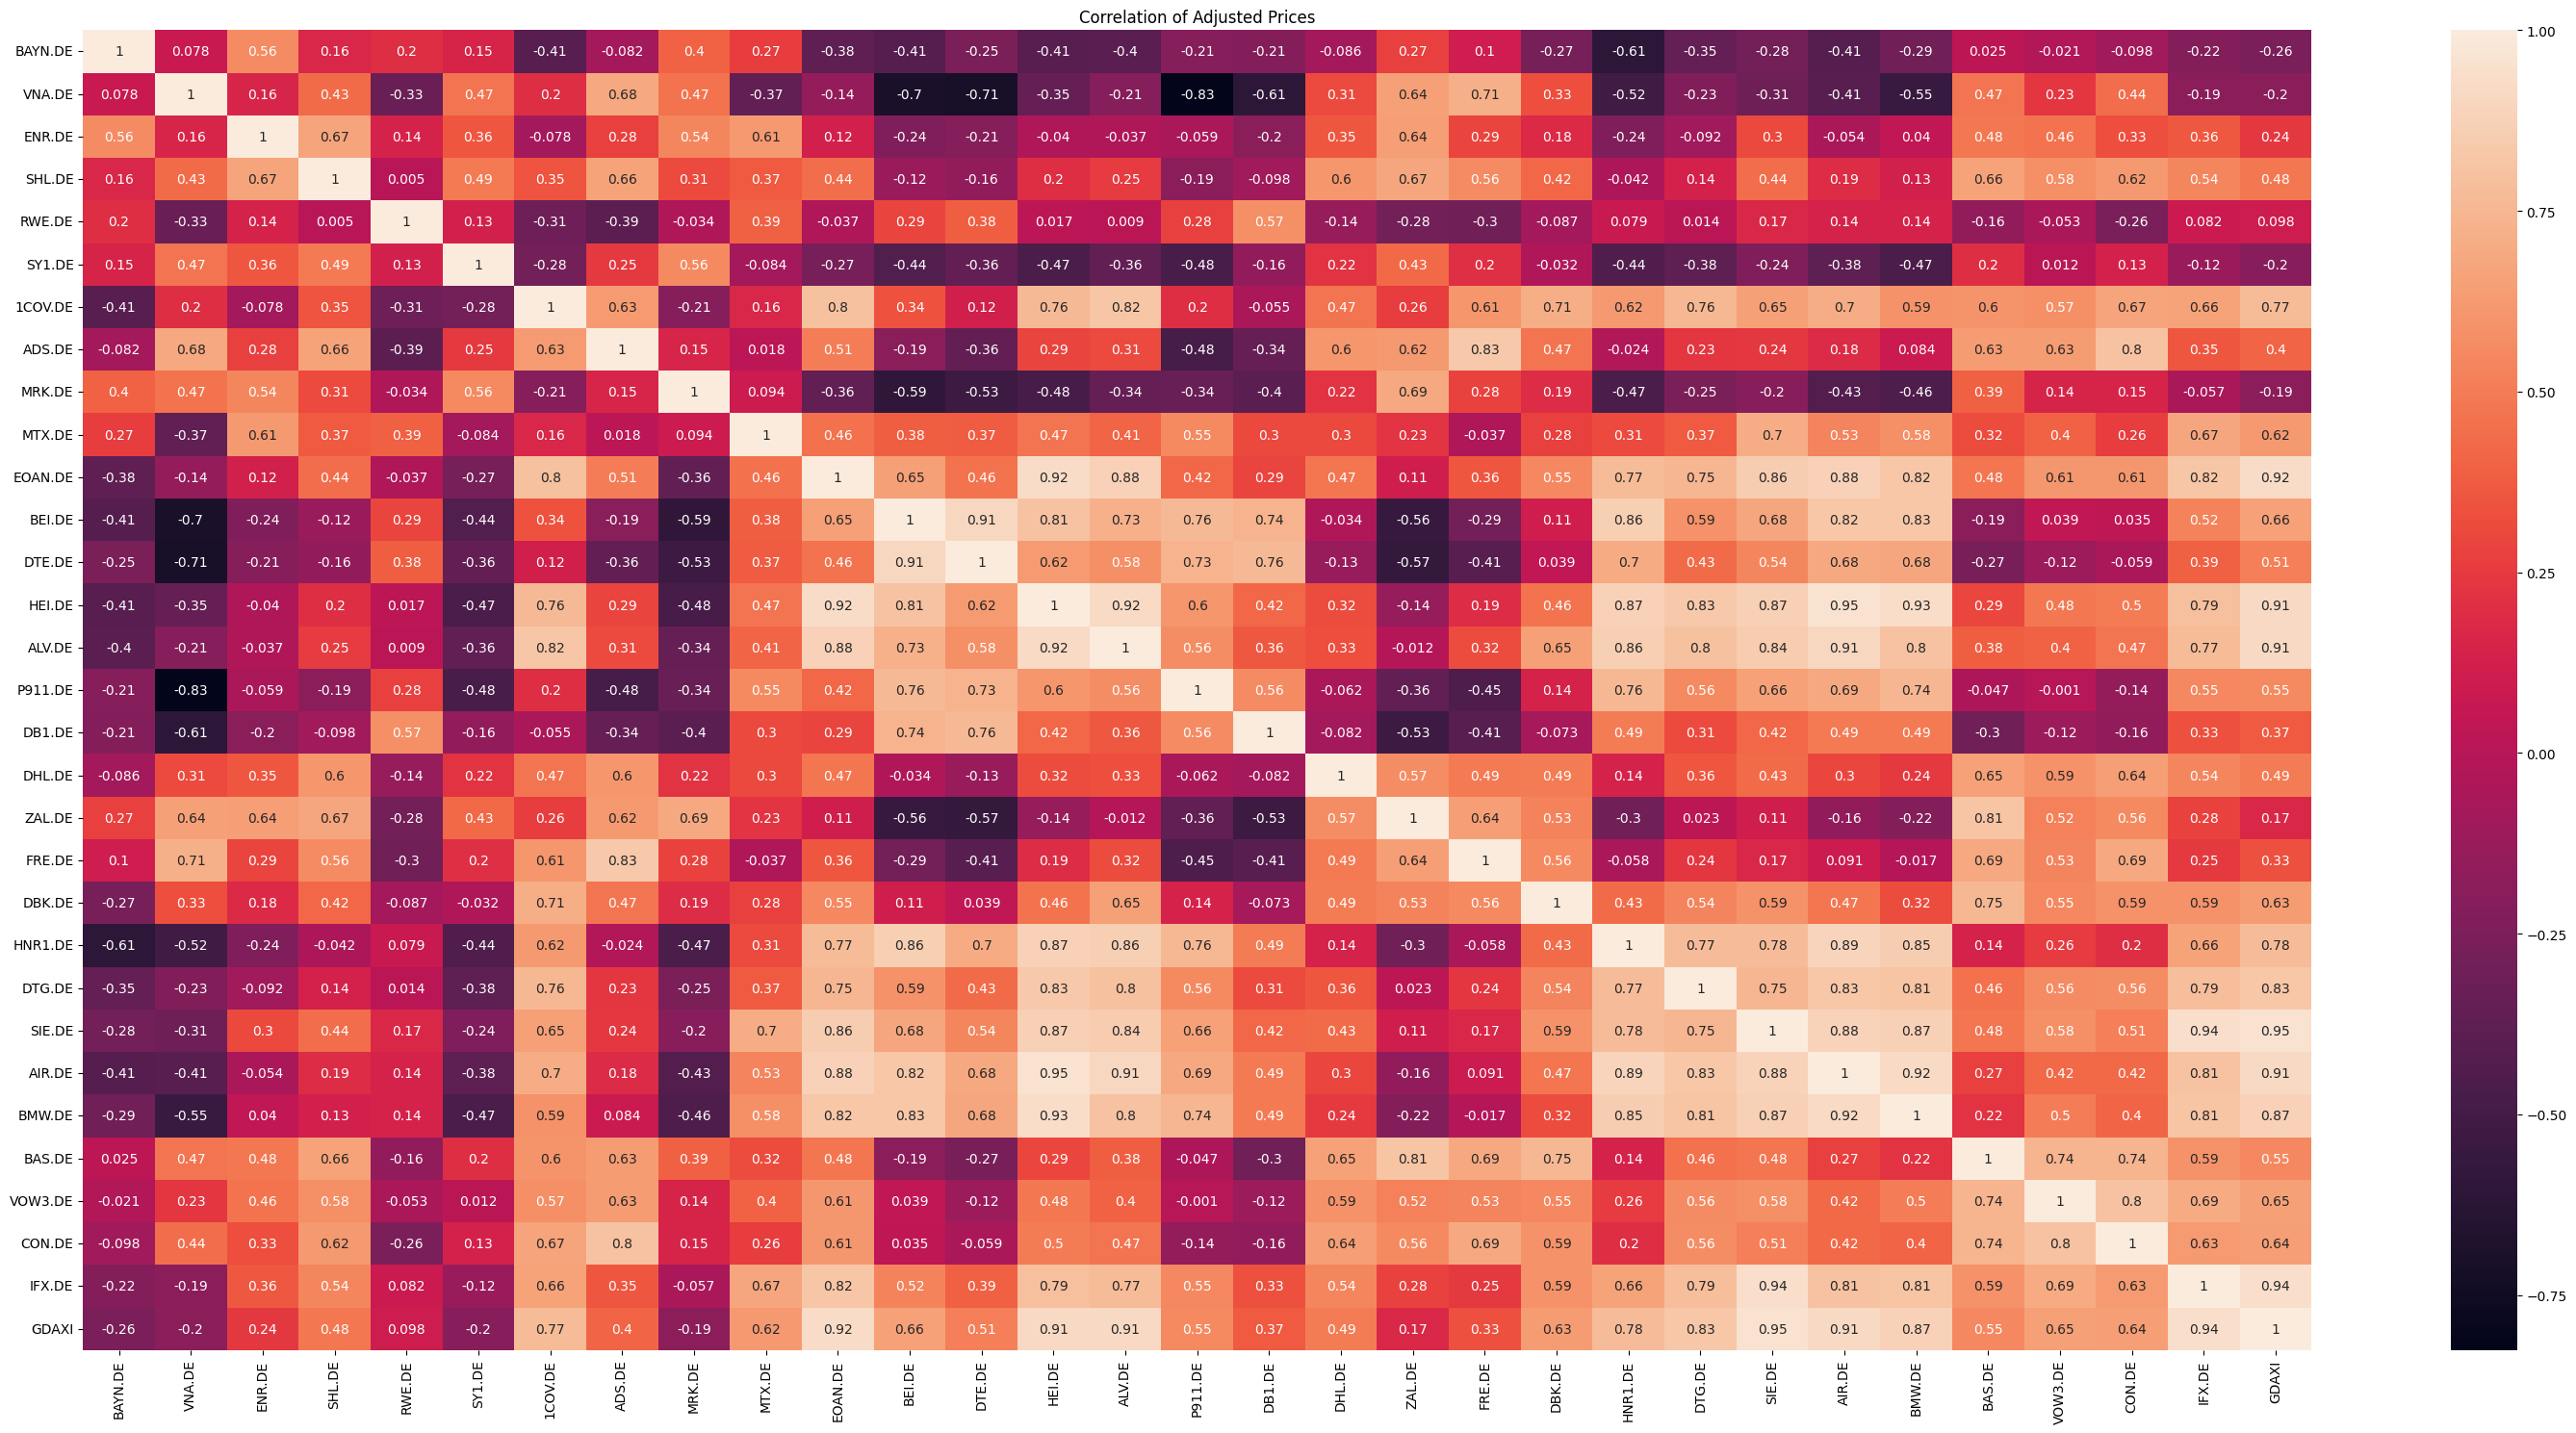

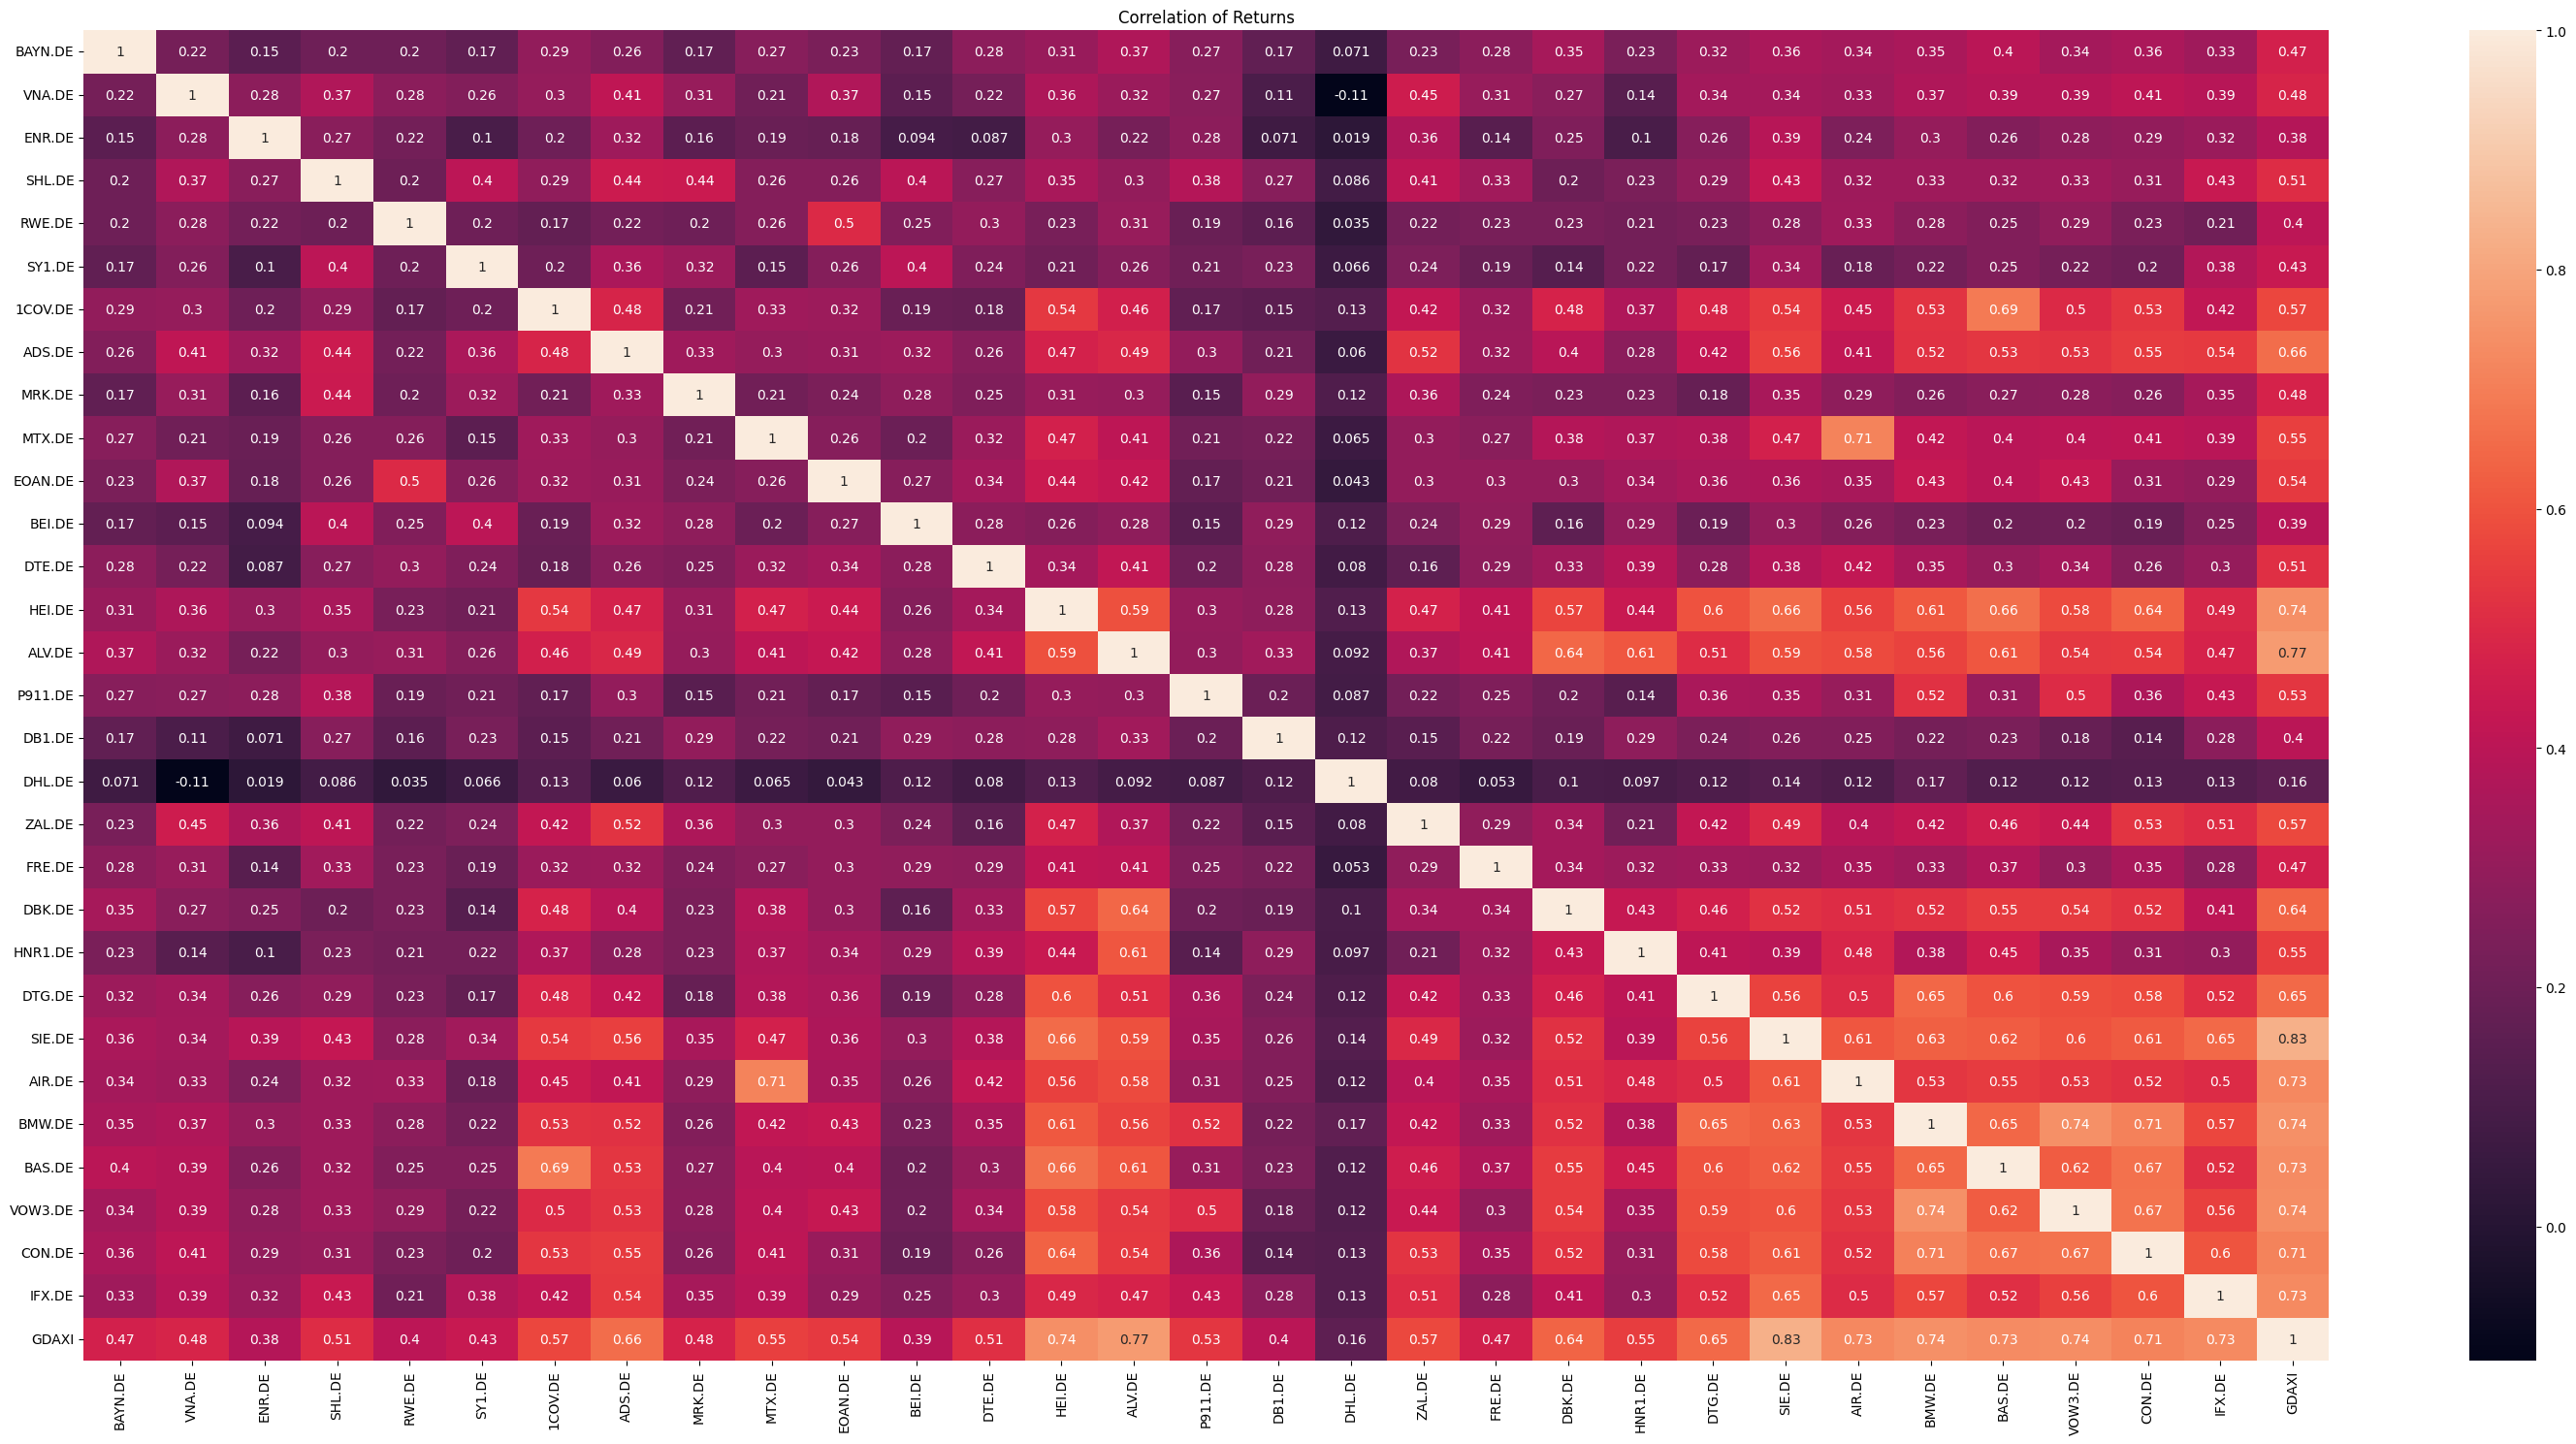

In [61]:
df_gdaxi, df_gdaxi_returns= get_correlations('GDAXI', 'EU', gdaxi_stocks, start_date, end_date)


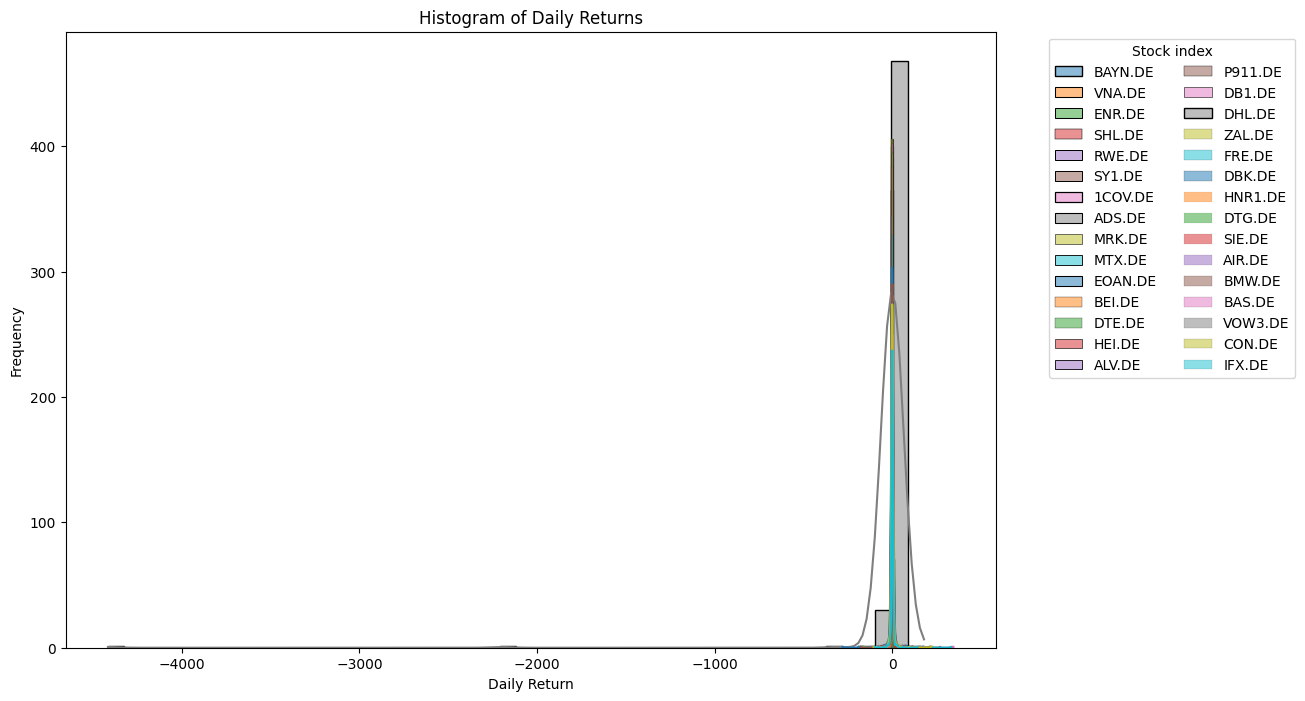

In [62]:
plt.figure(figsize=(12, 8))
for symbol in gdaxi_stocks:
    returns = df_gdaxi_returns[symbol].pct_change().dropna()
    sn.histplot(returns, bins=50, kde=True, label=symbol)
plt.title('Histogram of Daily Returns')
plt.legend(title='Stock index', bbox_to_anchor=(1.05, 1), loc='upper left', ncol=2)
plt.xlabel('Daily Return')
plt.ylabel('Frequency')
plt.show()

## 1st Method: Riskfolio-Lib

First, we tried an already programmed portfolio as the easiest and fastest way.

In [63]:
import riskfolio as rp
import warnings
warnings.filterwarnings("ignore")

In [64]:
def get_data_rp(stocks, index, start_date, end_date):
  stocks_dax=stocks
  stocks_dax.append(index)
  data = yf.download(stocks_dax, start=start_date, end=end_date)
  data = data.loc[:, ("Adj Close", slice(None))]
  data.columns = stocks_dax
  returns = data.pct_change()
  returns=returns[1:]
  returns.fillna(0, inplace=True)
  bench_returns = returns.pop(index).to_frame()
  port = rp.Portfolio(returns=returns)
  port.assets_stats(method_mu="hist", method_cov="hist")
  port.kindbench = False
  port.benchindex = bench_returns
  port.allowTE = True
  port.TE = 0.008
  w = port.optimization(model="Classic", rm="CVaR", obj="Sharpe", rf=0, l=0, hist=True)
  frontier = port.efficient_frontier(model="Classic", rm="CVaR",points=100,rf=0,hist=True)

  return [w, frontier, port]

In [65]:
gdaxi_stocks=['BAYN.DE' , 'VNA.DE' , 'ENR.DE' , 'SHL.DE' , 'RWE.DE' , 'SY1.DE' , '1COV.DE' , 'ADS.DE' , 'MRK.DE' , 'MTX.DE' , 'EOAN.DE' , 'BEI.DE' , 'DTE.DE' , 'HEI.DE' , 'ALV.DE' , 'P911.DE' , 'DB1.DE' , 'DHL.DE' , 'ZAL.DE' , 'FRE.DE' , 'DBK.DE' , 'HNR1.DE' , 'DTG.DE' , 'SIE.DE' , 'AIR.DE' , 'BMW.DE' , 'BAS.DE' , 'VOW3.DE' , 'CON.DE' , 'IFX.DE']
w, frontier, port=get_data_rp(gdaxi_stocks, '^GDAXI', start_date, end_date)

[*********************100%***********************]  31 of 31 completed


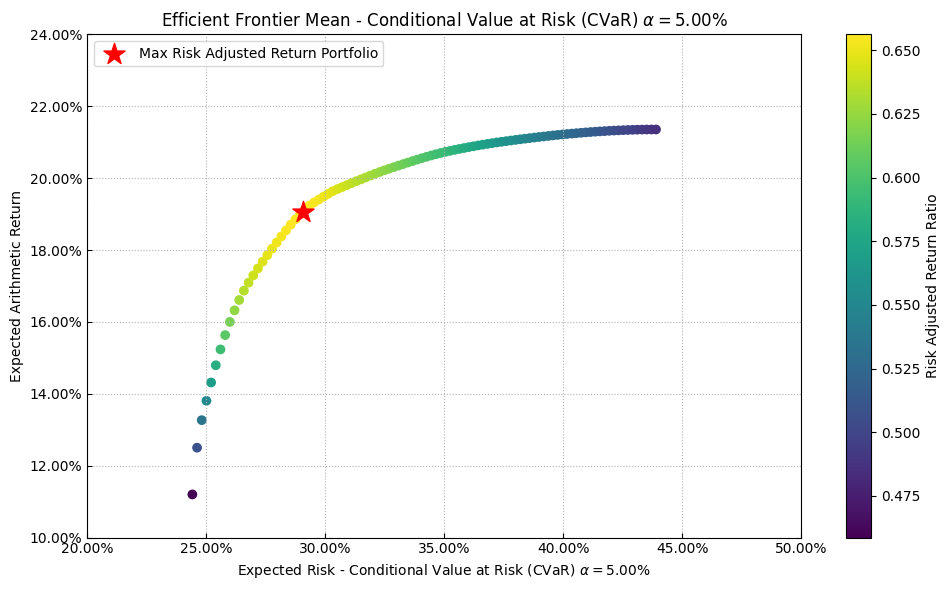

In [66]:
g1 = rp.plot_frontier(w_frontier=frontier,mu=port.mu,cov=port.cov,returns=port.returns,rm="CVaR",rf=0,cmap="viridis",w=w,label="Max Risk Adjusted Return Portfolio",marker="*")


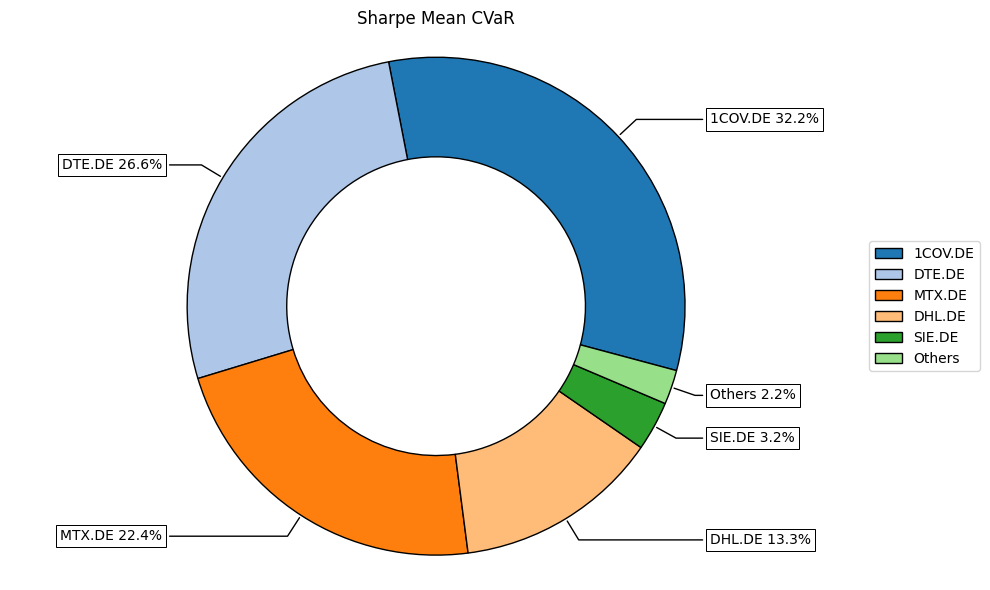

In [67]:
g2=rp.plot_pie(w=w,title="Sharpe Mean CVaR",others=0.05,nrow=25,cmap="tab20",height=6,width=10);


In [68]:
df_gdaxi_rp=pd.DataFrame(df_gdaxi_returns.iloc[:, :-1].mul(list(w['weights']), axis=1).sum(axis=1))
df_gdaxi_rp.rename(columns={0:'GDAXI_Replicated_Riskfolio'}, inplace=True)
weights_riskfolio=list(w['weights'])
df_gdaxi_rp.head()

GDAXI_Replicated_Riskfolio
Date                                  
2022-01-04                    0.011769
2022-01-05                    0.008885
2022-01-06                   -0.004316
2022-01-07                   -0.004212
2022-01-10                   -0.023083

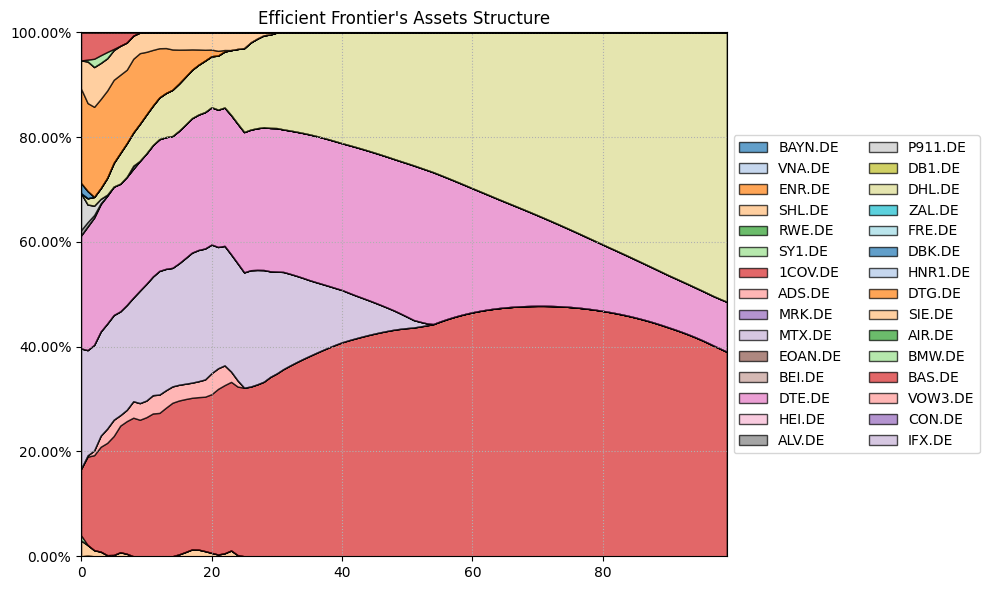

In [69]:
g3 = rp.plot_frontier_area(w_frontier=frontier, ax=None)

## 2nd Method: Give weights with Principal Component Analysis

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

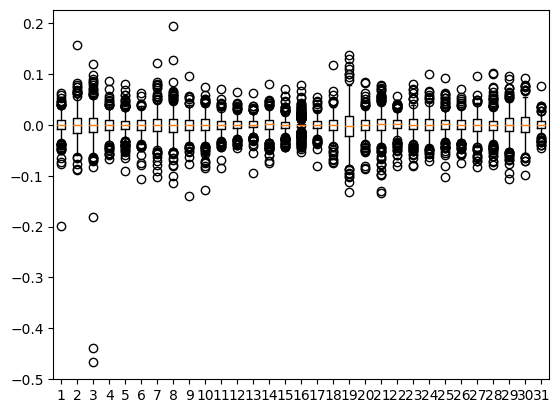

In [70]:
gdaxi_stocks=['BAYN.DE', 'VNA.DE', 'ENR.DE', 'SHL.DE', 'RWE.DE', 'SY1.DE', '1COV.DE', 'ADS.DE', 'MRK.DE', 'MTX.DE', 'EOAN.DE', 'BEI.DE', 'DTE.DE', 'HEI.DE', 'ALV.DE', 'P911.DE', 'DB1.DE', 'DHL.DE', 'ZAL.DE', 'FRE.DE', 'DBK.DE', 'HNR1.DE', 'DTG.DE', 'SIE.DE', 'AIR.DE', 'BMW.DE', 'BAS.DE', 'VOW3.DE', 'CON.DE', 'IFX.DE', '^GDAXI']
num_stocks=len(gdaxi_stocks)
lista_df, df_gdaxi, df_gdaxi_returns=extract_data(gdaxi_stocks, start_date, end_date )
df_gdaxi_returns=df_gdaxi_returns.iloc[1:, :]
df_gdaxi_returns.fillna(0, inplace=True)
#px.box(df_gdaxi_returns)
plt.boxplot(df_gdaxi_returns)
plt.show()

In [71]:
scaler=StandardScaler()
df_gdaxi_returns.iloc[:, :-1]=df_gdaxi_returns.iloc[:, :-1].replace(np.inf, np.nan)
df_gdaxi_returns.iloc[:, :-1]=df_gdaxi_returns.iloc[:, :-1].replace(-np.inf, np.nan)
df_gdaxi_returns.iloc[:, :-1]=df_gdaxi_returns.iloc[:, :-1].fillna(0)
pca = PCA(random_state=42)
pca.fit(df_gdaxi_returns.iloc[:, :-1])

# Calcular la varianza explicada y los pesos
variance = pca.explained_variance_ratio_
pesos = pca.components_.T @ variance
weights_pca=pesos
len(pesos)

30

In [72]:
df_gdaxi_returns_replicated=df_gdaxi_returns.copy()
for i in range(len(pesos)):
  df_gdaxi_returns_replicated.iloc[:, i]=df_gdaxi_returns_replicated.iloc[:, i]*pesos[i]
df_gdaxi_returns_replicated['GDAXI_REP_PCA']=df_gdaxi_returns_replicated.iloc[:,:-1].sum(axis=1)
df_gdaxi_returns_replicated=df_gdaxi_returns_replicated[['GDAXI_REP_PCA', '^GDAXI']]
df_gdaxi_returns_replicated.head()

GDAXI_REP_PCA    ^GDAXI
Date                               
2022-01-04       0.005983  0.008198
2022-01-05       0.012511  0.007349
2022-01-06      -0.029155 -0.013595
2022-01-07      -0.008871 -0.006518
2022-01-10      -0.023097 -0.011317

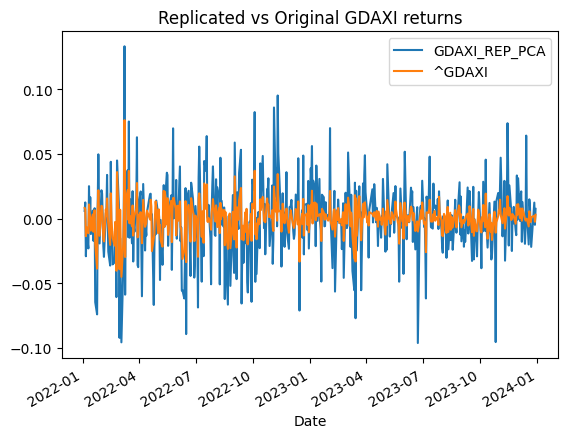

In [73]:
#px.line(df_gdaxi_returns_replicated)
df_gdaxi_returns_replicated.plot()
plt.title("Replicated vs Original GDAXI returns")
plt.show();

In [74]:
pesos

array([ 0.04301927,  0.10185201,  0.18298598,  0.06307156,  0.03553781,
        0.03122045,  0.08213145,  0.13225149,  0.0236419 , -0.00294979,
        0.0275939 ,  0.02754017,  0.00373219,  0.05671127,  0.03500296,
        0.03732154,  0.01307517,  0.04193985,  0.201834  ,  0.04947807,
        0.07875459, -0.00348602,  0.05931879,  0.05499102,  0.03062016,
        0.06918489,  0.07074932,  0.08445134,  0.13296163,  0.08001265])

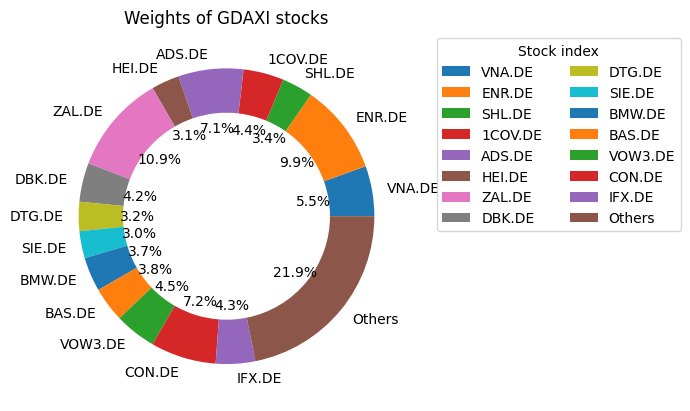

In [75]:
important_pesos=[abs(x) for x in pesos if x>0.05]
important_labels=[stock for stock, x in zip(gdaxi_stocks, pesos) if x>0.05]
peso_resto=sum([abs(x) for x in pesos if x<0.05])
important_pesos.append(peso_resto)
important_labels.append('Others')
plt.pie(important_pesos, labels=important_labels, autopct='%1.1f%%', wedgeprops=dict(width=0.3))
plt.title('Weights of GDAXI stocks')
plt.legend(title='Stock index', bbox_to_anchor=(1.05, 1), loc='upper left', ncol=2)
plt.show()

## 3rd Method: Sparse Method without MonteCarlo

In [76]:
import cvxpy as cvx
import numpy as np

def sparse_tracking(num_stocks, returns, index_returns,UpperBound, threshold, r):
    beta = cvx.Variable(num_stocks)
    t = cvx.Variable()
    opt_sol = np.array([])
    opt_val = np.inf
    opt_t = np.inf
    tracking_error = cvx.sum_squares(cvx.matmul(returns,beta) - index_returns)
    aim = cvx.Minimize(tracking_error + t)
    bs_constr = [beta >= 0, t >= 0, cvx.sum(beta) == 1]

    for i in range(num_stocks):
        constr = bs_constr + [cvx.log(beta[i]) + cvx.log(t) >= cvx.log(r)]
        eq = cvx.Problem(aim, constr)
        eq.solve()
        upperBound = eq.value - t.value + r *(np.sum(np.array(beta.value).reshape(-1,) > threshold))
        if upperBound < UpperBound:
            UpperBound = upperBound
        if eq.value < opt_val:
            opt_val = eq.value
            opt_sol = beta.value
            opt_t = t.value
    print(f"Solution found at step {i}")
    opt_value = opt_val
    opt_w = np.array(opt_sol).reshape(-1,)
    t = opt_t
    tracking_error = opt_value - opt_t
    return [opt_value, opt_w, t, tracking_error]

In [77]:
gdaxi_stocks=['BAYN.DE', 'VNA.DE', 'ENR.DE', 'SHL.DE', 'RWE.DE', 'SY1.DE', '1COV.DE', 'ADS.DE', 'MRK.DE', 'MTX.DE', 'EOAN.DE', 'BEI.DE', 'DTE.DE', 'HEI.DE', 'ALV.DE', 'P911.DE', 'DB1.DE', 'DHL.DE', 'ZAL.DE', 'FRE.DE', 'DBK.DE', 'HNR1.DE', 'DTG.DE', 'SIE.DE', 'AIR.DE', 'BMW.DE', 'BAS.DE', 'VOW3.DE', 'CON.DE', 'IFX.DE']
num_stocks=len(gdaxi_stocks)
lista_df, df_gdaxi, df_gdaxi_returns=extract_data(gdaxi_stocks, start_date, end_date )
lista_df_index, df_gdaxi_index, df_gdaxi_index_returns=extract_data(['^GDAXI'], start_date, end_date )
df_gdaxi_index_returns=df_gdaxi_index_returns[1:]
df_gdaxi_index_returns.fillna(0, inplace=True)
df_gdaxi_returns=df_gdaxi_returns[1:]
df_gdaxi_returns.fillna(0, inplace=True)
index_returns=df_gdaxi.sum(axis=1)
index_returns=np.log(index_returns / index_returns.shift(1))
index_returns.dropna(inplace=True)
threshold= 1e-7
r=0.01
opt_value, opt_w, t, tracking_error= sparse_tracking(num_stocks, df_gdaxi_returns, df_gdaxi_index_returns['^GDAXI'],  np.inf, threshold, r)
stocks_considered=np.array(gdaxi_stocks)[opt_w > threshold]
print('Found ', len(stocks_considered), ' stocks with weight bigger than threshold: ', stocks_considered)
weights_sparse_withoutMC=opt_w
print("Optimal weights: " ,opt_w)
print("Tracking error: ", (tracking_error)**0.5 )
print("Optimal Solution ", opt_value)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

Solution found at step 29
Found  24  stocks with weight bigger than threshold:  ['BAYN.DE' 'VNA.DE' 'ENR.DE' 'SHL.DE' 'RWE.DE' 'SY1.DE' 'ADS.DE' 'MRK.DE'
 'MTX.DE' 'EOAN.DE' 'BEI.DE' 'DTE.DE' 'HEI.DE' 'ALV.DE' 'P911.DE' 'DB1.DE'
 'DHL.DE' 'ZAL.DE' 'SIE.DE' 'AIR.DE' 'BMW.DE' 'VOW3.DE' 'CON.DE' 'IFX.DE']
Optimal weights:  [1.25308575e-02 1.19879154e-02 1.04425644e-02 2.00592517e-02
 8.41390196e-03 3.58206303e-02 1.21661575e-08 3.41269752e-07
 3.47104094e-02 2.68171827e-02 1.72563081e-02 1.13685133e-07
 5.60248810e-03 7.22361798e-07 5.51775576e-01 6.71228160e-03
 1.10569404e-06 3.61703561e-02 1.31689723e-02 2.09994901e-08
 2.59182445e-09 3.94287697e-09 7.51243757e-08 8.43275048e-02
 5.40909237e-03 1.41758151e-02 2.67168365e-08 4.96696246e-02
 9.31372854e-07 5.49459113e-02]
Tracking error:  0.09896224316163085
Optimal Solution  0.027916836164464005


In [78]:
df_gdaxi_sparse=pd.DataFrame(df_gdaxi_returns.mul(opt_w, axis=1).sum(axis=1))
df_gdaxi_sparse.rename(columns={0:'GDAXI_Replicated'}, inplace=True)
df_gdaxi_sparse['GDAXI_orig']=df_gdaxi_index_returns
df_gdaxi_sparse.head()

GDAXI_Replicated  GDAXI_orig
Date                                    
2022-01-04          0.017308    0.008198
2022-01-05          0.004660    0.007349
2022-01-06         -0.000389   -0.013595
2022-01-07          0.004141   -0.006518
2022-01-10         -0.008009   -0.011317

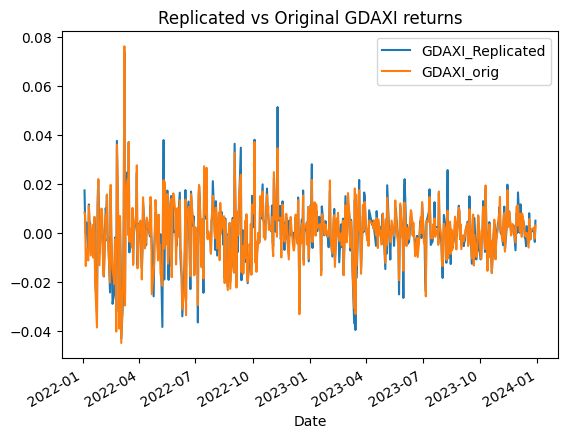

In [79]:
df_gdaxi_sparse.plot()
plt.title("Replicated vs Original GDAXI returns")
plt.show();

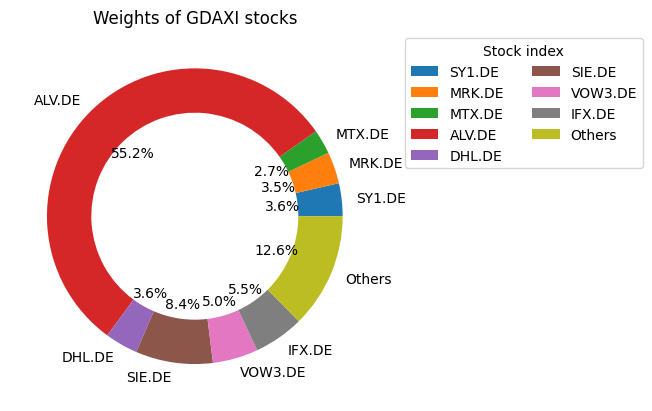

In [80]:
important_pesos=[abs(x) for x in opt_w if x>0.025]
important_labels=[stock for stock, x in zip(gdaxi_stocks, opt_w) if x>0.025]
peso_resto=sum([abs(x) for x in opt_w if x<0.025])
important_pesos.append(peso_resto)
important_labels.append('Others')
plt.pie(important_pesos, labels=important_labels, autopct='%1.1f%%', wedgeprops=dict(width=0.3))
plt.title('Weights of GDAXI stocks')
plt.legend(title='Stock index', bbox_to_anchor=(1.05, 1), loc='upper left', ncol=2)
plt.show()

## 4th Method: Allocation using Non-Negative Least Squares (NNLS) Optimization

In [81]:
df_gdaxi.fillna(0, inplace=True)

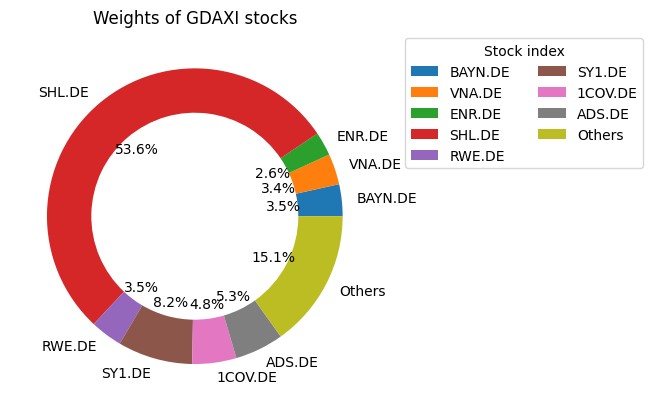

In [82]:
from scipy.optimize import nnls
result = nnls(df_gdaxi_returns, list(df_gdaxi_index_returns['^GDAXI']))
weights = result[0]
weights_nnls=weights
factor=result[1]
weights_plotting=[abs(x) for x in opt_w if x>0.025]
important_labels=[stock for stock, x in zip(gdaxi_stocks, weights_plotting) if x>0.025]
peso_resto=sum([abs(x) for x in weights if x<0.025])
weights_plotting.append(peso_resto)
important_labels.append('Others')
plt.pie(weights_plotting, labels=important_labels, autopct='%1.1f%%', wedgeprops=dict(width=0.3))
plt.title('Weights of GDAXI stocks')
plt.legend(title='Stock index', bbox_to_anchor=(1.05, 1), loc='upper left', ncol=2)
plt.show()

In [83]:
df_gdaxi_nnls=pd.DataFrame(df_gdaxi_returns.mul(weights, axis=1).sum(axis=1))
df_gdaxi_nnls.rename(columns={0:'GDAXI_NNLS'}, inplace=True)
df_gdaxi_nnls['GDAXI_orig']=df_gdaxi_index_returns
df_gdaxi_nnls.head()

GDAXI_NNLS  GDAXI_orig
Date                              
2022-01-04    0.010080    0.008198
2022-01-05    0.004246    0.007349
2022-01-06   -0.009733   -0.013595
2022-01-07   -0.003596   -0.006518
2022-01-10   -0.011082   -0.011317

## 5th Sparse Index Replication with Sequential MonteCarlo

*This method is the main focus of the project and is currently beind developed according to the paper: Satpathy, Tanmay and Shah, Rushabh, “Sparse Index Tracking Using Sequential Monte Carlo”, (2021). For the draft submission this method should be finished, therefore the main results of the paper above mentioned should be reached.*

*The current code about this method is collected in support_boosting.py, regression_utils.py and reweigth_sampling.py*




# Comparison of several methods

In [84]:
df_gdaxi_comp=df_gdaxi_sparse
df_gdaxi_comp['GDAXI_REP_PCA']=df_gdaxi_returns_replicated[['GDAXI_REP_PCA']]
df_gdaxi_comp['GDAXI_RISKFOLIO']=df_gdaxi_rp
df_gdaxi_comp['GDAXI_NNLS']=df_gdaxi_nnls[['GDAXI_NNLS']]

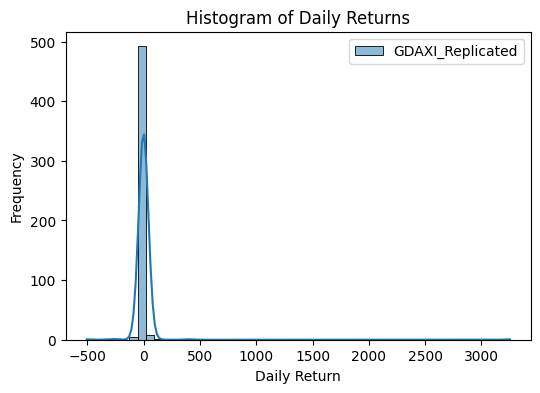

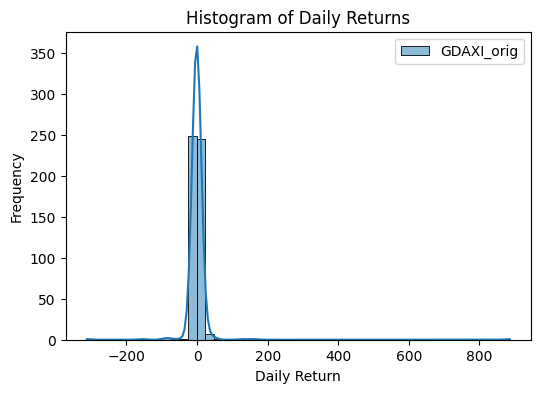

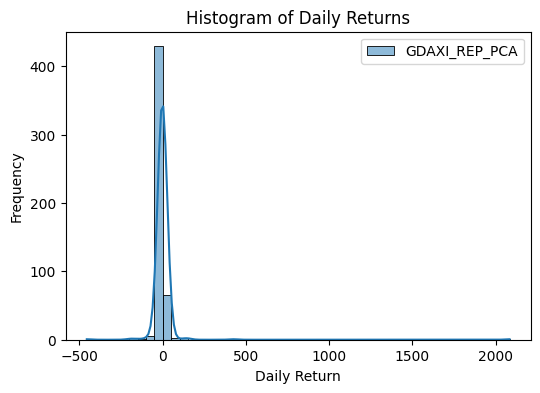

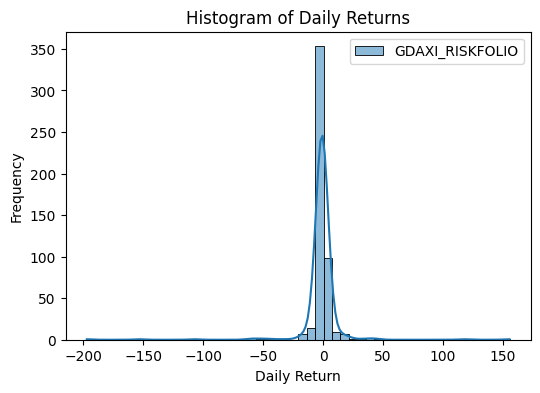

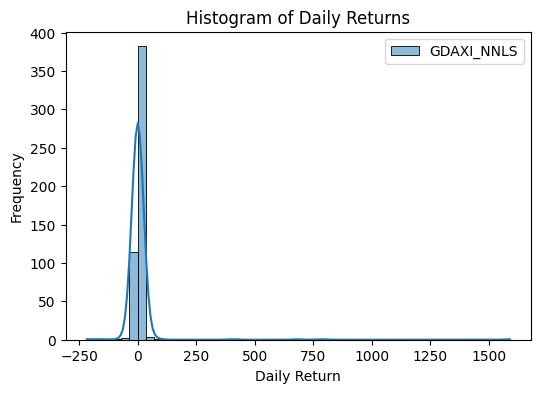

In [85]:
# Plot individual histograms for daily returns

for symbol in list(df_gdaxi_comp.columns):
    plt.figure(figsize=(6, 4))
    returns = df_gdaxi_comp[symbol].pct_change().dropna()
    sn.histplot(returns, bins=50, kde=True, label=symbol)
    plt.title('Histogram of Daily Returns')
    plt.xlabel('Daily Return')
    plt.ylabel('Frequency')
    plt.legend()
    plt.show()


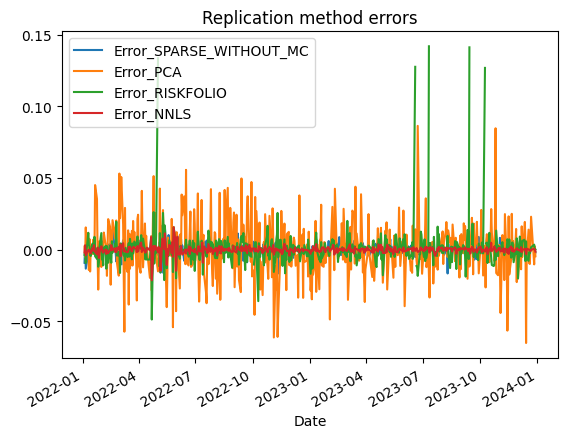

In [86]:
#Let's calculate difference between them
df_gdaxi_comp['Error_SPARSE_WITHOUT_MC']=df_gdaxi_comp['GDAXI_orig']-df_gdaxi_comp['GDAXI_Replicated']
df_gdaxi_comp['Error_PCA']=df_gdaxi_comp['GDAXI_orig']-df_gdaxi_comp['GDAXI_REP_PCA']
df_gdaxi_comp['Error_RISKFOLIO']=df_gdaxi_comp['GDAXI_orig']-df_gdaxi_comp['GDAXI_RISKFOLIO']
df_gdaxi_comp['Error_NNLS']=df_gdaxi_comp['GDAXI_orig']-df_gdaxi_comp['GDAXI_NNLS']

df_gdaxi_comp[['Error_SPARSE_WITHOUT_MC', 'Error_PCA', 'Error_RISKFOLIO', 'Error_NNLS']].plot()
plt.title("Replication method errors")
plt.show();

In [87]:
df_tracking_error=pd.DataFrame()
df_tracking_error['SPARSE_WITHOUT_MC']=(df_gdaxi_comp['GDAXI_orig']-df_gdaxi_comp['GDAXI_Replicated']).apply(lambda x: np.sqrt(abs(x)/(df_gdaxi_comp['GDAXI_orig'].shape[0]-1)))
df_tracking_error['PCA']=(df_gdaxi_comp['GDAXI_orig']-df_gdaxi_comp['GDAXI_REP_PCA']).apply(lambda x: np.sqrt(abs(x)/(df_gdaxi_comp['GDAXI_orig'].shape[0]-1)))
df_tracking_error['RISKFOLIO']=(df_gdaxi_comp['GDAXI_orig']-df_gdaxi_comp['GDAXI_RISKFOLIO']).apply(lambda x: np.sqrt(abs(x)/(df_gdaxi_comp['GDAXI_orig'].shape[0]-1)))
df_tracking_error['NNLS']=(df_gdaxi_comp['GDAXI_orig']-df_gdaxi_comp['GDAXI_NNLS']).apply(lambda x: np.sqrt(abs(x)/(df_gdaxi_comp['GDAXI_orig'].shape[0]-1)))

In [88]:
df_tracking_error.head()

SPARSE_WITHOUT_MC       PCA  RISKFOLIO      NNLS
Date                                                        
2022-01-04           0.004226  0.002084   0.002646  0.001921
2022-01-05           0.002296  0.003182   0.001735  0.002467
2022-01-06           0.005089  0.005523   0.004265  0.002752
2022-01-07           0.004572  0.002148   0.002127  0.002394
2022-01-10           0.002547  0.004806   0.004803  0.000679

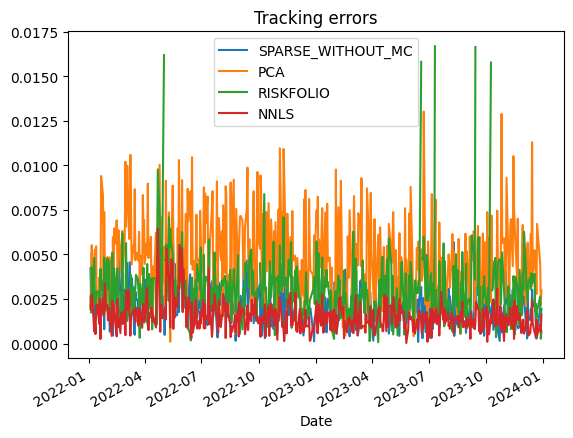

In [89]:
df_tracking_error.plot()
plt.title("Tracking errors")
plt.show();

In [90]:
df_tracking_error.describe()

SPARSE_WITHOUT_MC         PCA   RISKFOLIO        NNLS
count         511.000000  511.000000  511.000000  511.000000
mean            0.002211    0.004768         inf    0.001523
std             0.001109    0.002322         NaN    0.000820
min             0.000092    0.000104    0.000072    0.000030
25%             0.001412    0.002955    0.001963    0.000984
50%             0.002115    0.004534    0.002916    0.001427
75%             0.002837    0.006173    0.003797    0.001921
max             0.006283    0.013016         inf    0.006466

In [100]:
df_prices=pd.DataFrame()
df_prices['SPARSE_WITHOUT_MC']=df_gdaxi_sparse=pd.DataFrame(df_gdaxi.mul(weights_sparse_withoutMC, axis=1).sum(axis=1))
df_prices['PCA']=df_gdaxi_sparse=pd.DataFrame(df_gdaxi.mul(weights_pca, axis=1).sum(axis=1))
df_prices['RISKFOLIO']=df_gdaxi_sparse=pd.DataFrame(df_gdaxi.mul(weights_riskfolio, axis=1).sum(axis=1))
df_prices['NNLS']=df_gdaxi_sparse=pd.DataFrame(df_gdaxi.mul(weights_nnls, axis=1).sum(axis=1))
df_prices['^GDAXI']=df_gdaxi_index

df_prices.head()


SPARSE_WITHOUT_MC         PCA  RISKFOLIO        NNLS        ^GDAXI
Date                                                                          
2022-01-03         143.336163  140.410441  76.891699  101.659085  16020.730469
2022-01-04         146.473771  140.828282  78.049374  102.942918  16152.610352
2022-01-05         147.080685  141.921684  78.818529  103.447180  16271.750000
2022-01-06         147.775583  139.229934  78.614762  102.490091  16052.030273
2022-01-07         148.675123  138.041394  78.307495  102.159210  15947.740234

In [101]:
df_prices.describe()

SPARSE_WITHOUT_MC         PCA   RISKFOLIO        NNLS        ^GDAXI
count         512.000000  512.000000  512.000000  512.000000    512.000000
mean          142.644184  111.488235   74.011233   96.601265  14769.332859
std            13.792120   11.102399    7.066088    8.375807   1180.976035
min           110.545449   83.512254   56.292557   77.503897  11975.549805
25%           133.742258  103.643139   69.211813   89.447228  13913.082764
50%           147.128809  113.374528   75.099303   99.400748  15094.010254
75%           152.832973  117.829588   80.038189  103.379219  15789.732666
max           169.881954  141.921684   87.036480  111.418782  16794.429688

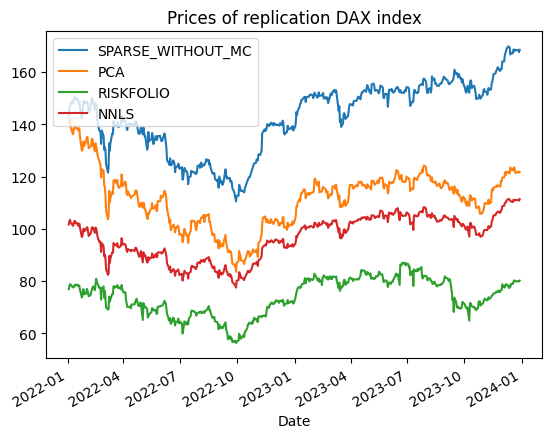

In [102]:
df_prices[['SPARSE_WITHOUT_MC', 'PCA', 'RISKFOLIO', 'NNLS']].plot()
plt.title("Prices of replication DAX index")
plt.show();

# IBEX 35 (SPAIN)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

<Figure size 10000x1000 with 0 Axes>

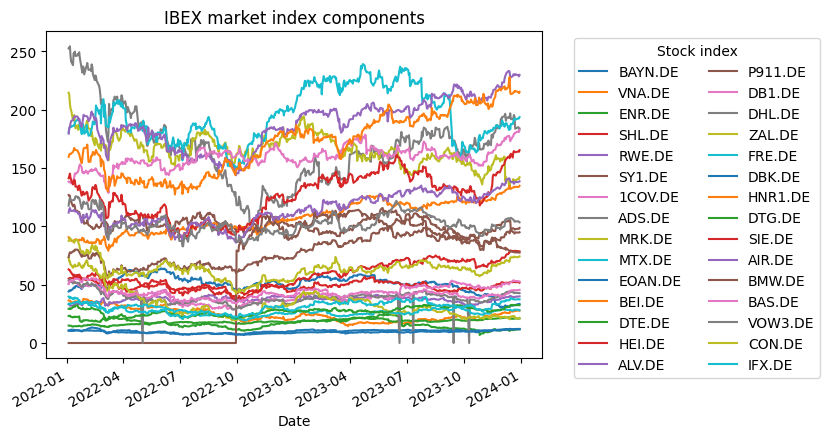

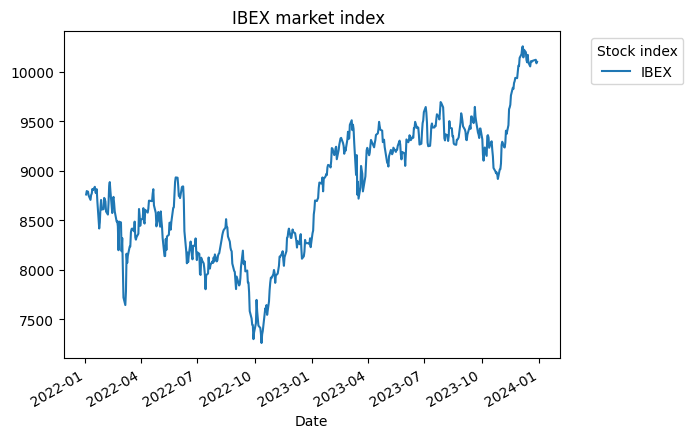

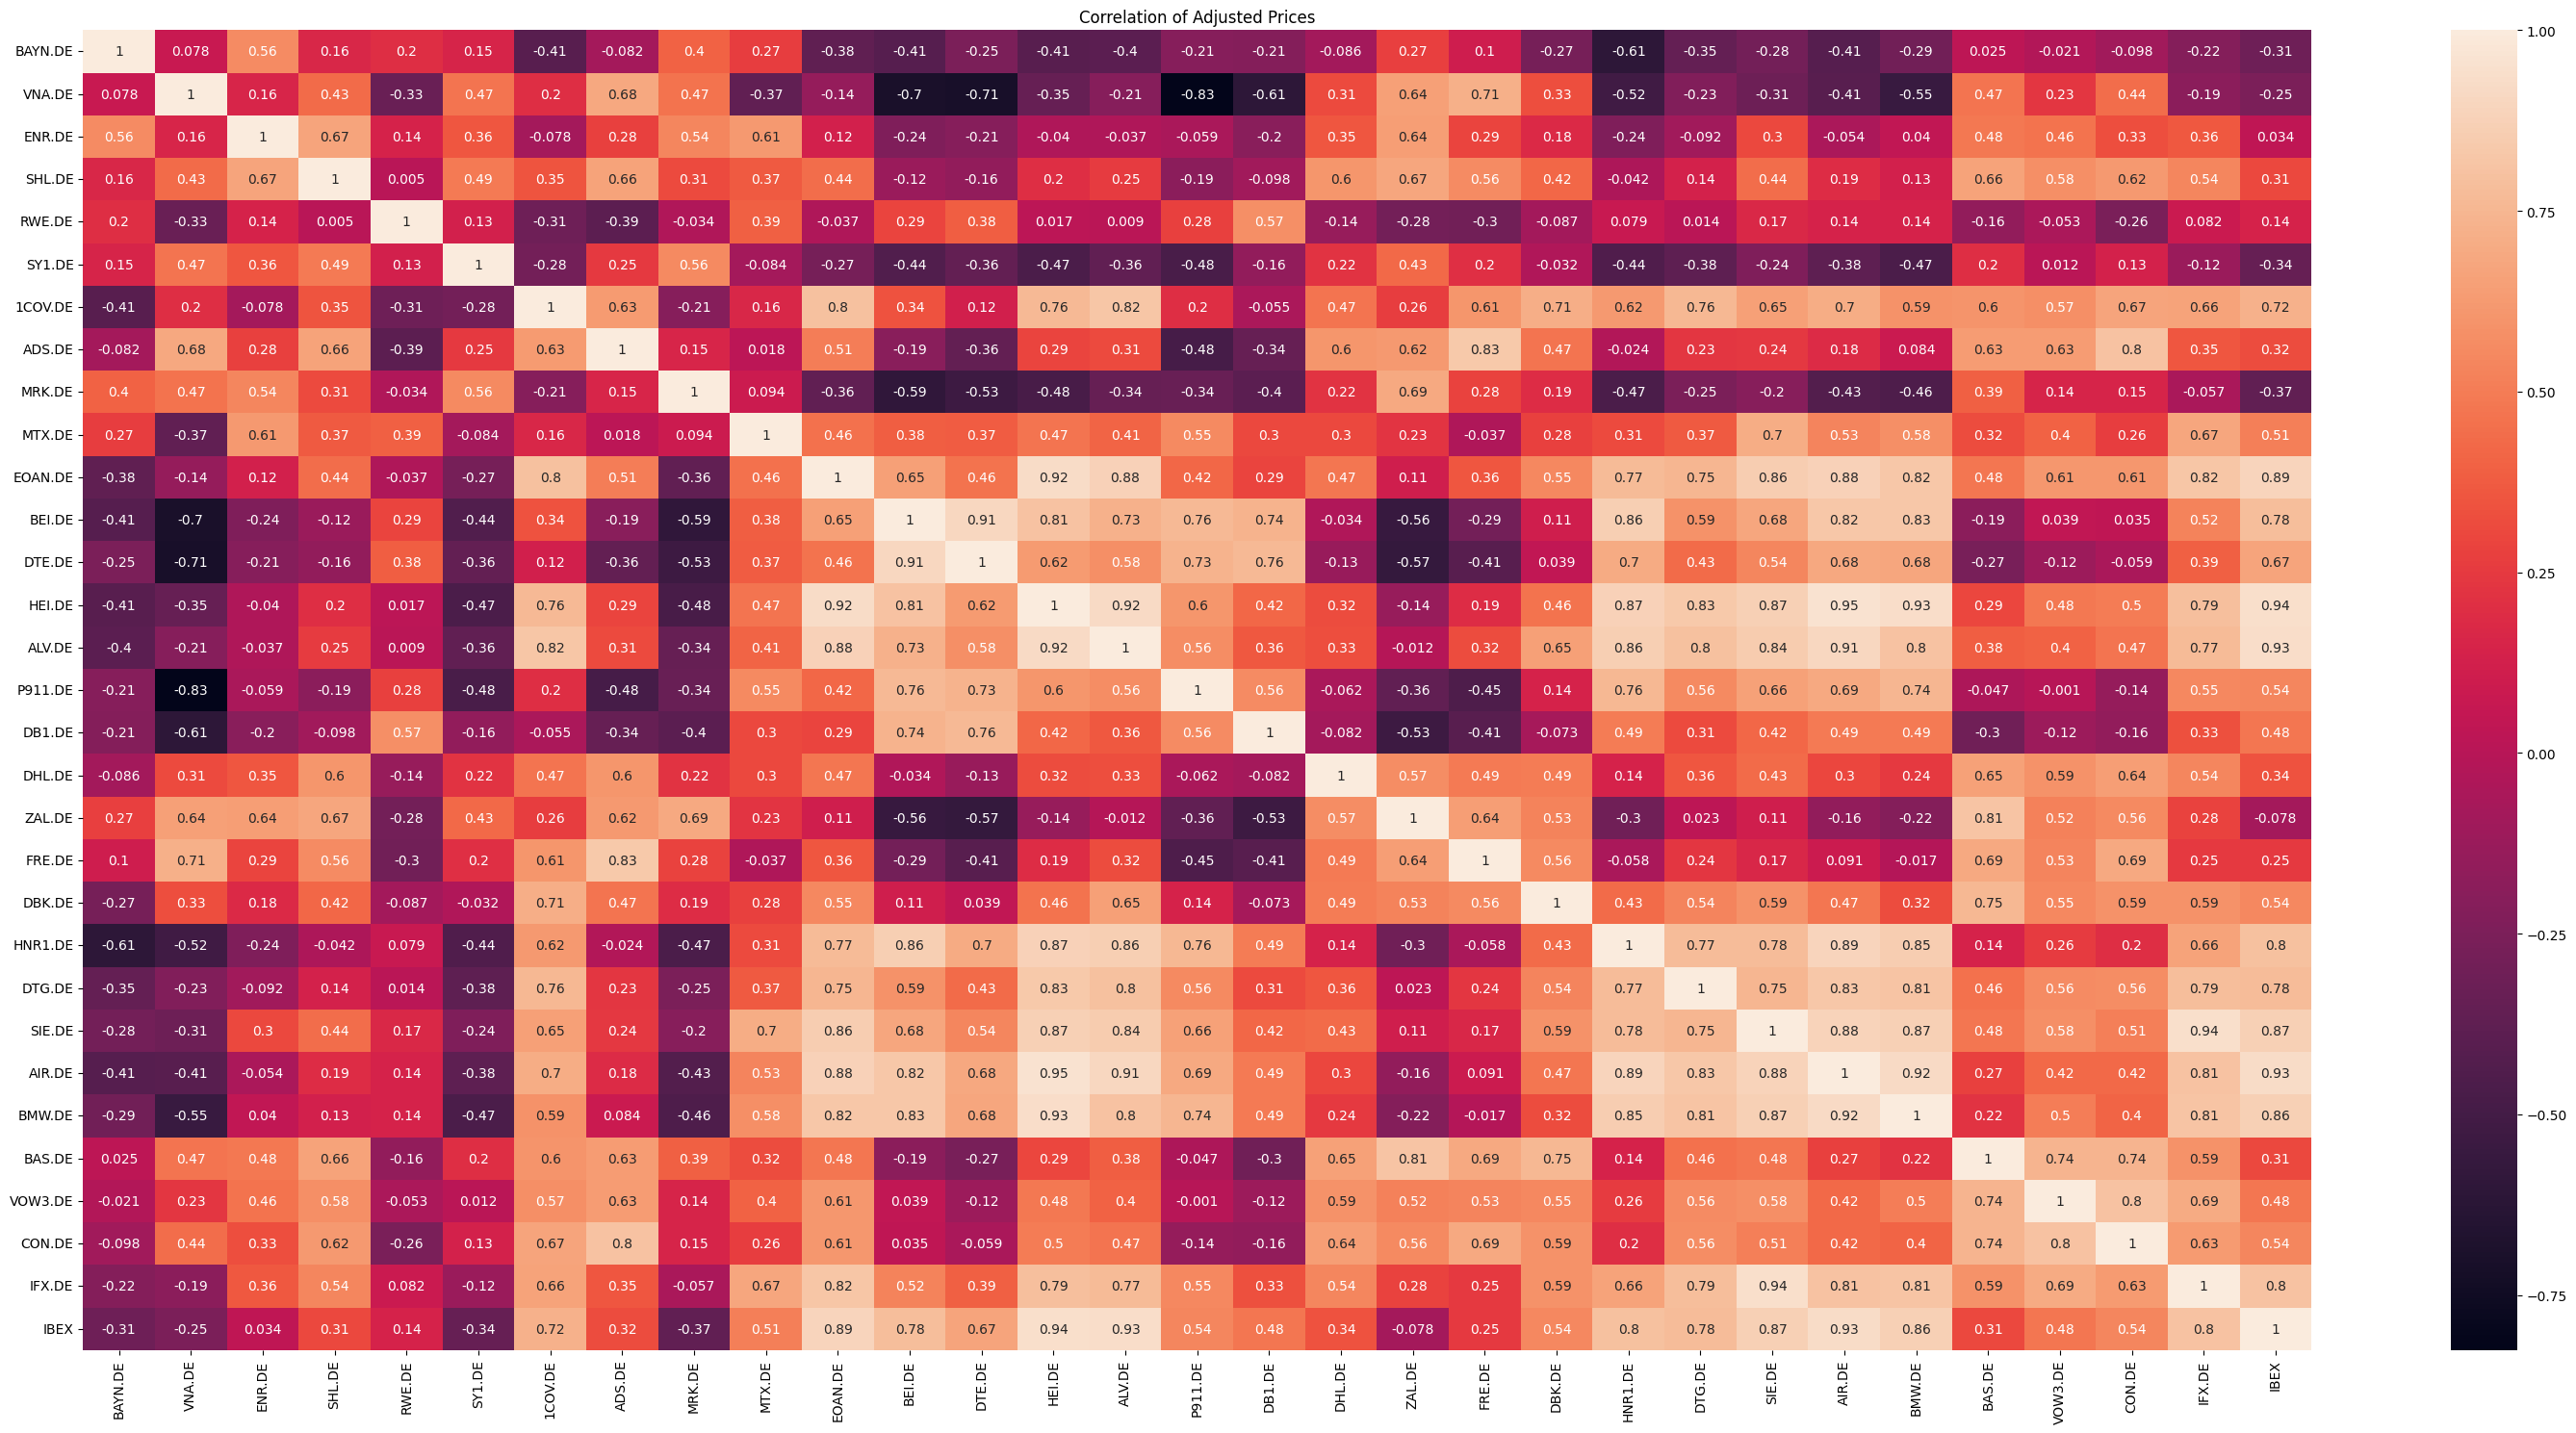

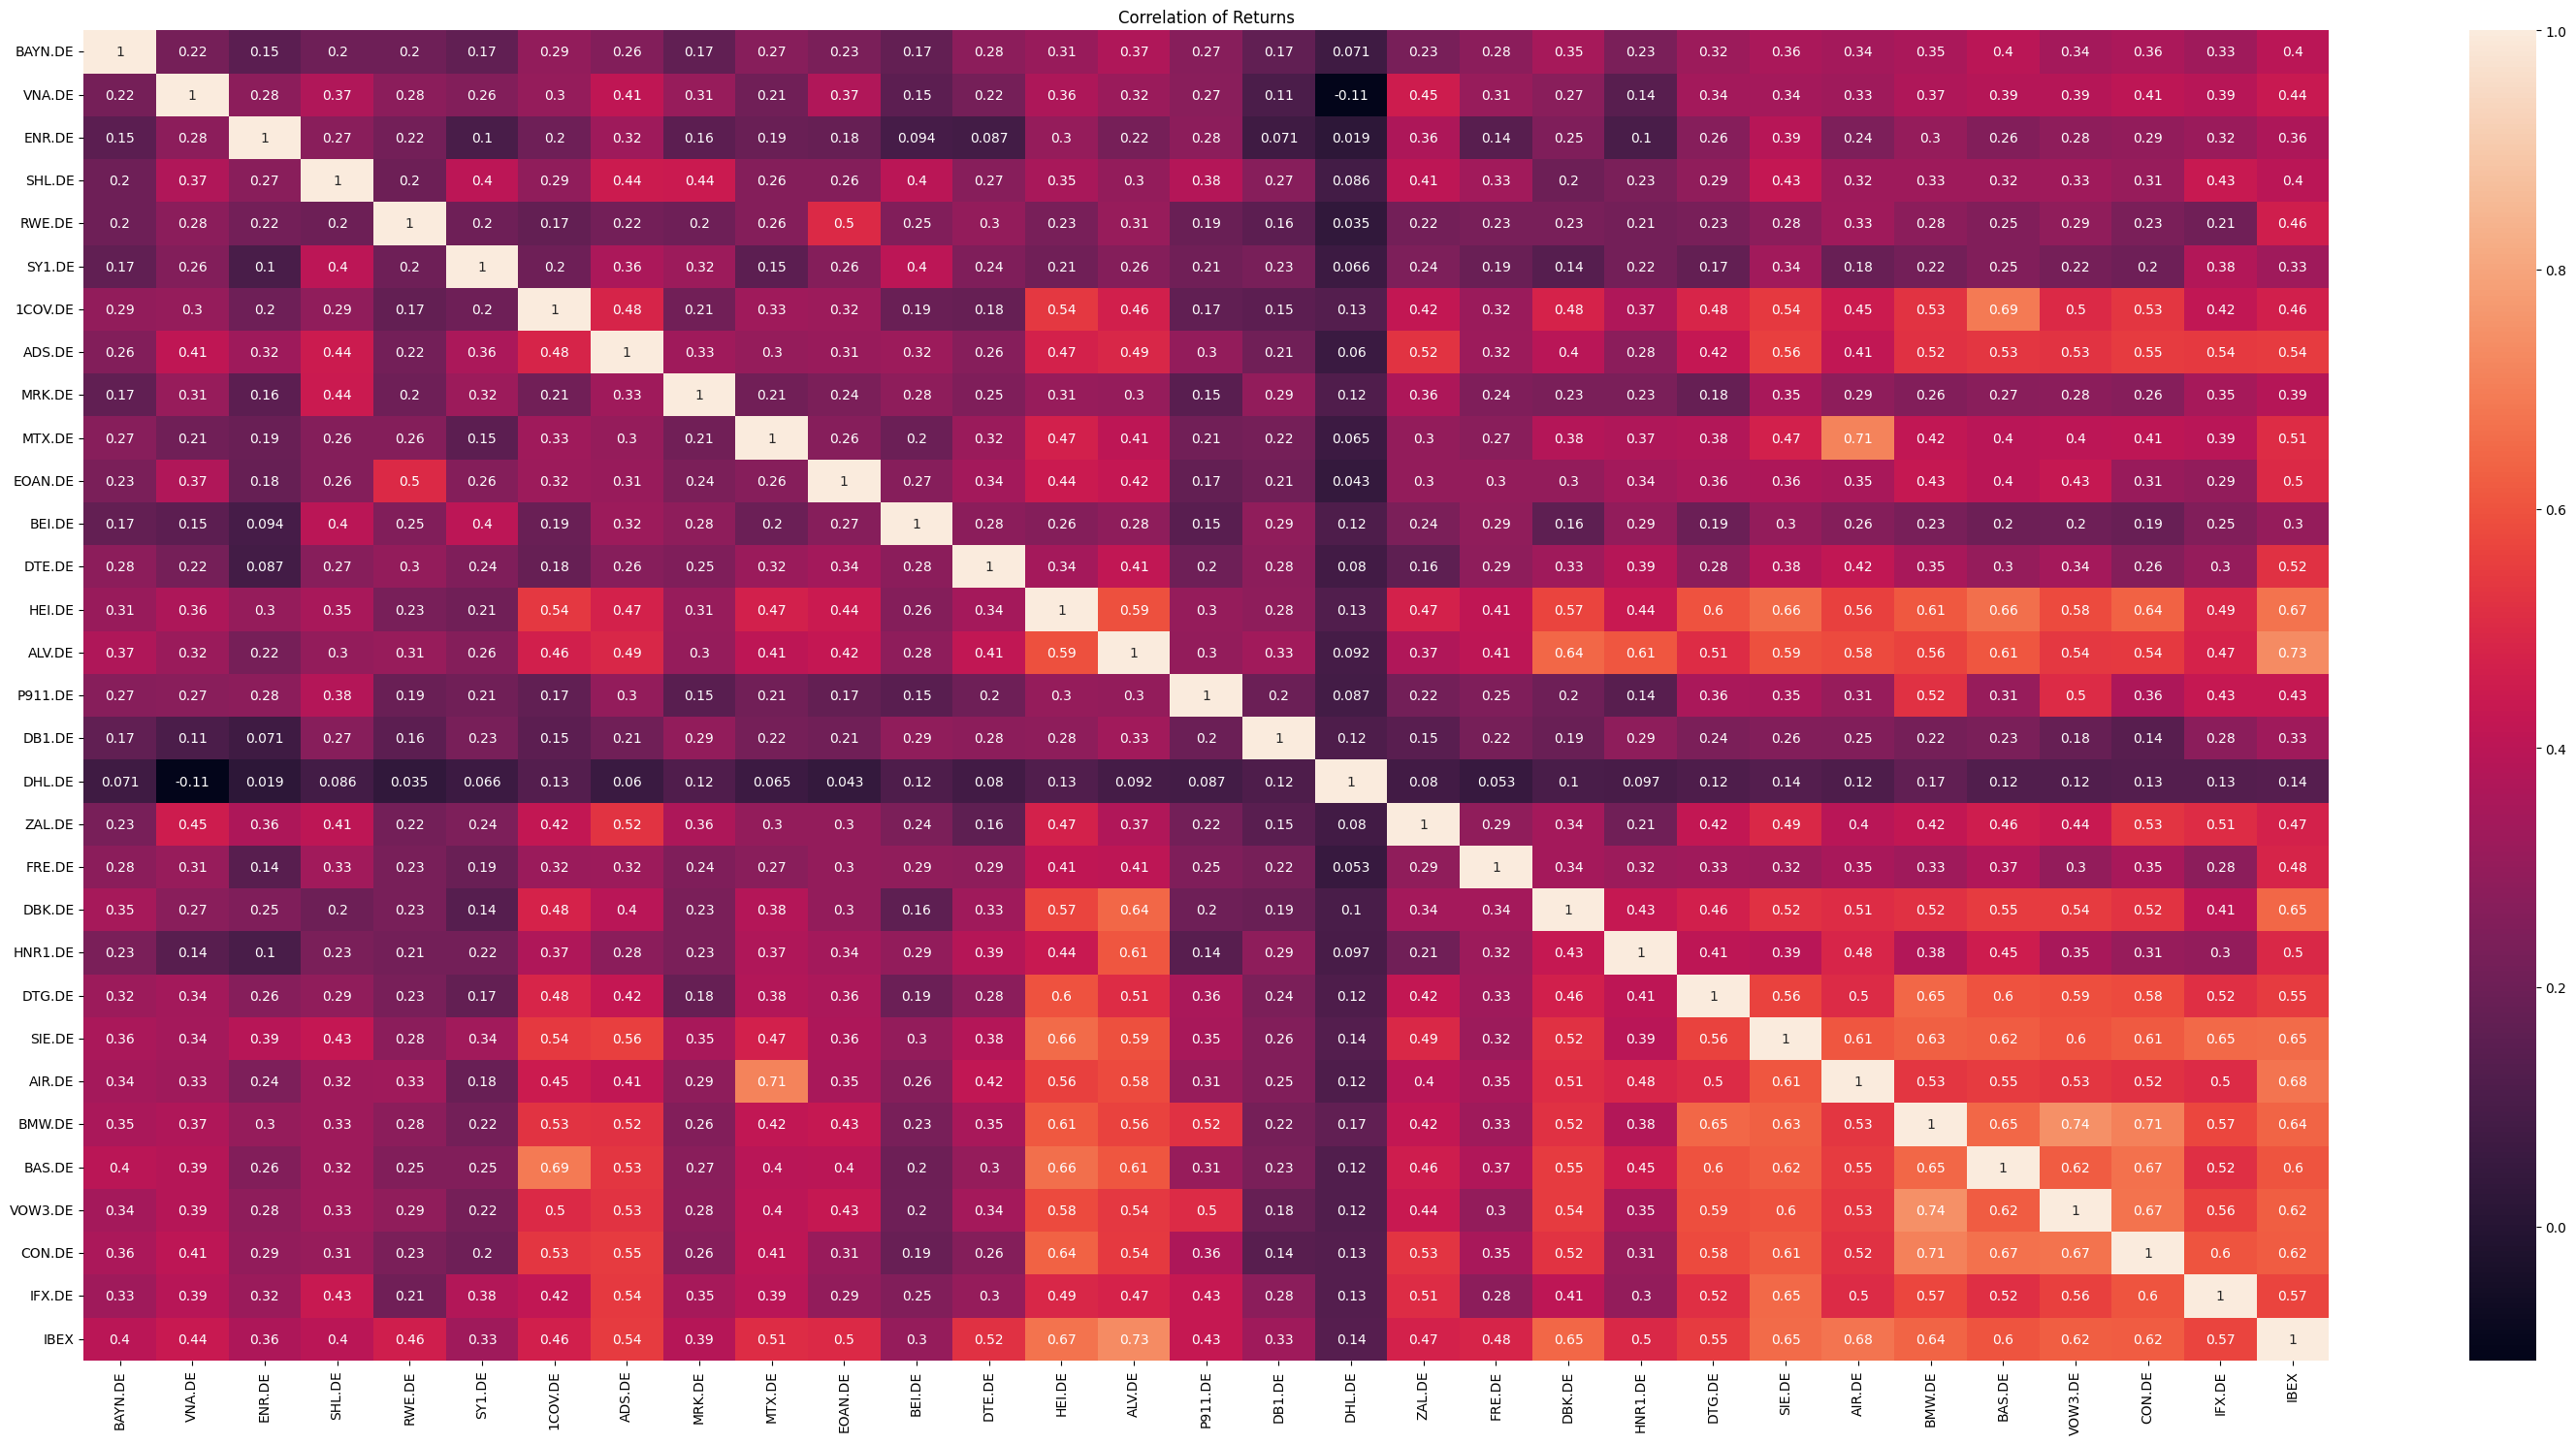

[*********************100%***********************]  30 of 30 completed


In [92]:
ibex_stocks=['FER.MC' , 'AENA.MC' , 'IBE.MC' , 'MRL.MC' , 'IAG.MC' , 'NTGY.MC' , 'CLNX.MC' , 'TEF.MC' , 'ITX.MC' , 'ELE.MC' , 'LOG.MC' , 'RED.MC' , 'MTS.MC' , 'FDR.MC' , 'CABK.MC' , 'ANE.MC' , 'BKT.MC' , 'ANA.MC' , 'ENG.MC' , 'AMS.MC' , 'SAB.MC' , 'MAP.MC' , 'BBVA.MC' , 'COL.MC' , 'SAN.MC' , 'ACS.MC' , 'GRF.MC' , 'ACX.MC' , 'UNI.MC' ] #, 'PUIG.MC' was included in 2024
df_ibex, df_ibex_returns= get_correlations('IBEX', 'EU', ibex_stocks, start_date, end_date)
w, frontier, port=get_data_rp(ibex_stocks, '^IBEX', "2021-01-01", "2023-12-31")

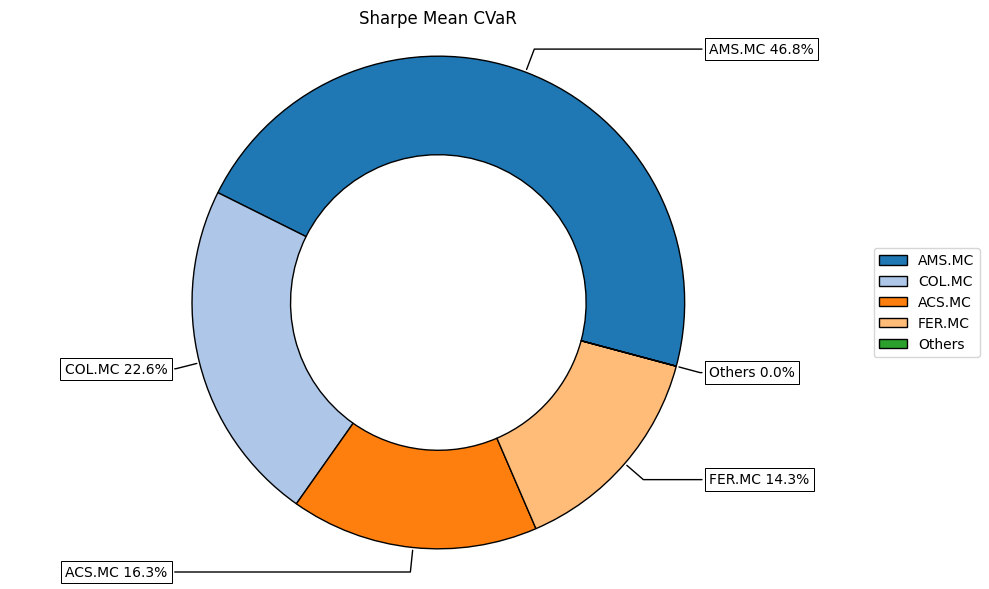

In [93]:
g2=rp.plot_pie(w=w,title="Sharpe Mean CVaR",others=0.05,nrow=25,cmap="tab20",height=6,width=10);


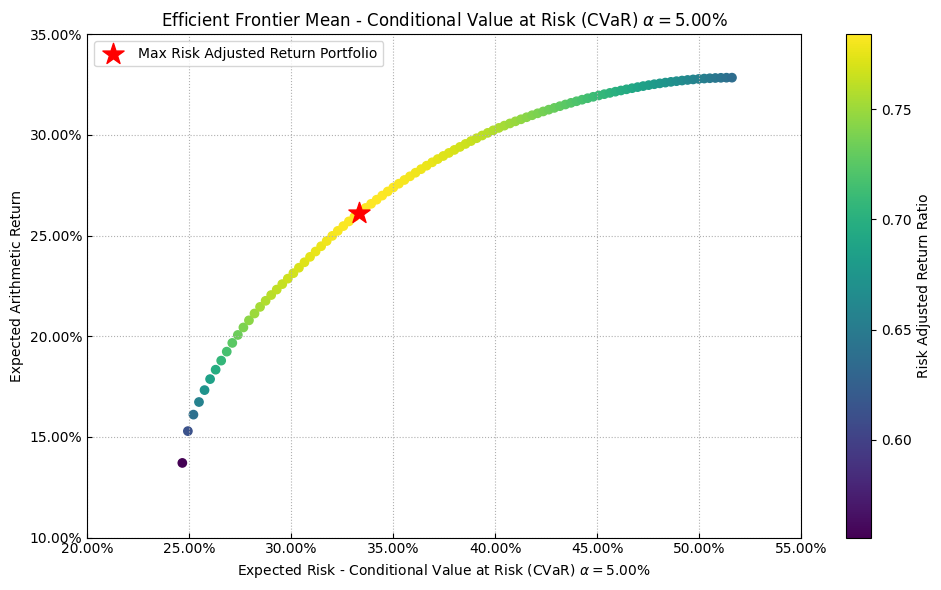

In [94]:
g1 = rp.plot_frontier(w_frontier=frontier,mu=port.mu,cov=port.cov,returns=port.returns,rm="CVaR",rf=0,cmap="viridis",w=w,label="Max Risk Adjusted Return Portfolio",marker="*")


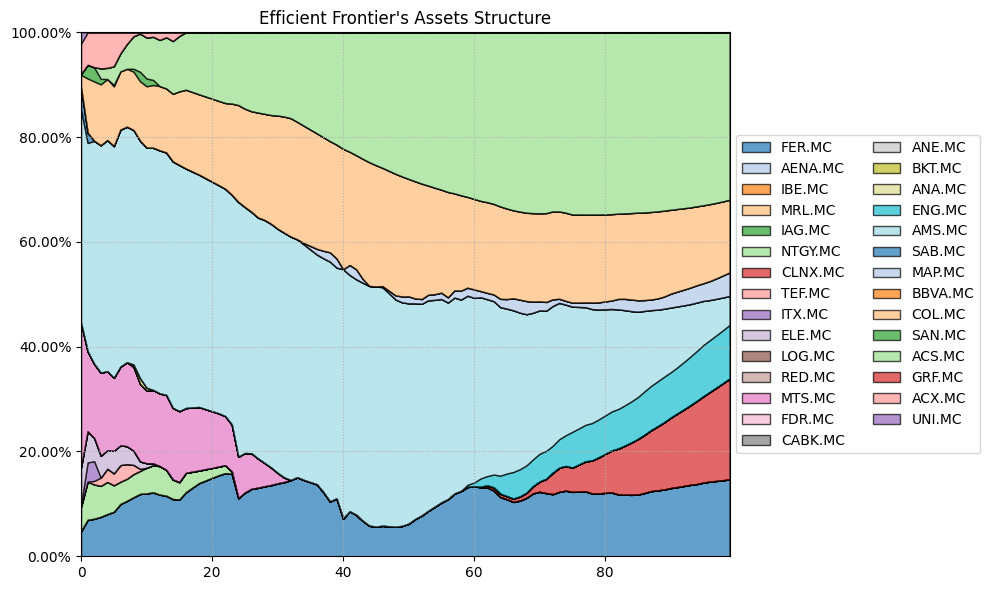

In [95]:
g3 = rp.plot_frontier_area(w_frontier=frontier, cmap="tab20", height=6, width=10, ax=None)

# BVSP Bovespa Index (Brasil)

In [96]:
bovespa_stocks=['EMBR3.SA' , 'CTIP3.SA' , 'ENBR3.SA' , 'CESP6.SA' , 'CIEL3.SA' , 'BRPR3.SA' , 'ABEV3.SA' , 'CPFE3.SA' , 'CMIG4.SA' , 'CSNA3.SA' , 'BBSE3.SA' , 'EQTL3.SA' , 'CYRE3.SA' , 'BRFS3.SA' , 'CPLE6.SA' , 'CCRO3.SA' , 'BBDC3.SA' , 'BRAP4.SA' , 'ELET3.SA' , 'BBAS3.SA' , 'BBDC4.SA' , 'CSAN3.SA' , 'ESTC3.SA' , 'ECOR3.SA' , 'BVMF3.SA' , '656690' , 'BRML3.SA' , 'GGBR4.SA' , 'BRKM5.SA' , 'FIBR3.SA' ]
df_bovespa, df_bov, df_ret_bov=extract_data(bovespa_stocks, start_date, end_date)
df_bov.head()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['CTIP3.SA']: YFPricesMissingError('$%ticker%: possibly delisted; no price data found  (1d 2022-01-01 -> 2023-12-31)')
[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ENBR3.SA']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')
[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['CESP6.SA']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[**************

EMBR3.SA  CTIP3.SA  ENBR3.SA  CESP6.SA  CIEL3.SA    BRPR3.SA  \
Date                                                                        
2022-01-03  25.240000       NaN       NaN       NaN  1.798741  364.622070   
2022-01-04  25.219999       NaN       NaN       NaN  1.741246  354.837036   
2022-01-05  23.719999       NaN       NaN       NaN  1.733033  337.841919   
2022-01-06  23.870001       NaN       NaN       NaN  1.691966  335.266876   
2022-01-07  24.070000       NaN       NaN       NaN  1.683752  332.176880   

             ABEV3.SA   CPFE3.SA  CMIG4.SA   CSNA3.SA  ...   BBDC4.SA  \
Date                                                   ...              
2022-01-03  13.839315  21.573629  5.041865  18.081089  ...  15.484462   
2022-01-04  13.821261  21.506941  5.037951  17.808142  ...  15.585982   
2022-01-05  13.550432  21.165165  4.877457  17.430025  ...  15.475781   
2022-01-06  13.333770  20.665003  4.771766  17.206944  ...  15.696191   
2022-01-07  13.117107  21.123484  4.799167  17.935673  ...  15.924468   

             CSAN3.SA  ESTC3.SA  ECOR3.SA  BVMF3.SA  656690  BRML3.SA  \
Date                                                                    
2022-01-03  19.464180       NaN  6.857232       NaN     NaN       NaN   
2022-01-04  19.583706       NaN  6.741823       NaN     NaN       NaN   
2022-01-05  18.609116       NaN  6.674500       NaN     NaN       NaN   
2022-01-06  18.176991       NaN  6.684118       NaN     NaN       NaN   
2022-01-07  18.213766       NaN  6.732205       NaN     NaN       NaN   

             GGBR4.SA   BRKM5.SA  FIBR3.SA  
Date                                        
2022-01-03  17.364016  52.399281       NaN  
2022-01-04  17.606071  52.067406       NaN  
2022-01-05  17.313063  49.569130       NaN  
2022-01-06  17.319433  48.757881       NaN  
2022-01-07  17.472303  48.619602       NaN  

[5 rows x 30 columns]

In [97]:
len(bovespa_stocks)

30